
# Introduction

In [509]:
import sys
import os
import math
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import geodatasets
import geopandas as gpd
import re
import folium
from folium import plugins
import earthpy as et
import webbrowser
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import get_cmap
from branca.colormap import LinearColormap
import statsmodels.api as sm
from geopy.distance import geodesic
from scipy.stats import norm
import elevation
import shapely.geometry
from shapely.geometry import Point, box, Polygon, MultiPolygon
import seaborn as sns
from shapely.wkt import loads
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import rasterio
from rasterio.plot import show
from rasterio.warp import reproject, Resampling, calculate_default_transform
from rasterio.transform import from_bounds, from_origin
from rasterio.mask import mask
import earthpy.spatial as es
from scipy.interpolate import RegularGridInterpolator
from matplotlib.backends.backend_pdf import PdfPages
import streamlit as st
import matplotlib.colors as mcolors
import PyCO2SYS as cs


In [510]:
df = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Datasets/NMS_Copy_080125.xlsx', sheet_name='Final_compiled')

df_abra = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Datasets/Abra.xlsx', sheet_name='Sheet1')

df_copy = df.copy()


In [511]:
df_rain = df[df['Sample type'] == 'Rain']    

#print(df_rain['Sample ID'])

In [512]:
df_copy = df_copy[df_copy['Sample type'].isin(['Spring', 'Spring water', 'Groundwater'])] 

In [513]:
# Convert concentrations from ppm to mM
df_rain['Ca_mM'] = df_rain['Ca_ppm'] / 40.08
df_rain['Mg_mM'] = df_rain['Mg_ppm'] / 24.31
df_rain['Si_mM'] = df_rain['Si_ppm'] / 28.09
df_rain['Na_mM'] = df_rain['Na_ppm'] / 22.99
df_rain['Li_mM'] = df_rain['Li_ppm'] / 6.94
df_rain['K_mM'] = df_rain['K_ppm'] / 39.10
df_rain['Al_mM'] = df_rain['Al_ppm'] / 26.98
df_rain['Li_uM'] = df_rain['Li_mM'] * 1000
df_rain['Sr_mM'] = df_rain['Sr_ppm'] / 87.62



# Convert Cl from molar to mM
df_rain['Cl_mM'] = df_rain['Cl_molar'] / 1000



# Calculate ion ratios
df_rain['Na/Ca'] = df_rain['Na_mM'] / df_rain['Ca_mM']
df_rain['Ca/Na'] = df_rain['Ca_mM'] / df_rain['Na_mM']
df_rain['Mg/Ca'] = df_rain['Mg_mM'] / df_rain['Ca_mM']
df_rain['Mg/Na'] = df_rain['Mg_mM'] / df_rain['Na_mM']
df_rain['Ca/Sr'] = df_rain['Ca_mM'] / df_rain['Sr_mM']
df_rain['1000xSr/Ca'] = df_rain['Sr_mM'] / df_rain['Ca_mM'] * 1000
df_rain['Si/Ca'] = df_rain['Si_mM'] / df_rain['Ca_mM']

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/996095350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain['Ca_mM'] = df_rain['Ca_ppm'] / 40.08
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/996095350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain['Mg_mM'] = df_rain['Mg_ppm'] / 24.31
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/996095350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [514]:
# Convert concentrations from ppm to mM
df_copy['Ca_mM'] = df_copy['Ca_ppm'] / 40.08
df_copy['Sr_mM'] = df_copy['Sr_ppm'] / 87.62
df_copy['Mg_mM'] = df_copy['Mg_ppm'] / 24.31
df_copy['Si_mM'] = df_copy['Si_ppm'] / 28.09
df_copy['Na_mM'] = df_copy['Na_ppm'] / 22.99
df_copy['Li_mM'] = df_copy['Li_ppm'] / 6.94
df_copy['K_mM'] = df_copy['K_ppm'] / 39.10
df_copy['Al_mM'] = df_copy['Al_ppm'] / 26.98
df_copy['Li_uM'] = df_copy['Li_mM'] * 1000
# Convert Cl from molar to mM
df_copy['Cl_mM'] = df_copy['Cl_molar'] / 1000



# Calculate ion ratios
df_copy['Na/Ca'] = df_copy['Na_mM'] / df_copy['Ca_mM']
df_copy['Ca/Na'] = df_copy['Ca_mM'] / df_copy['Na_mM']
df_copy['Mg/Ca'] = df_copy['Mg_mM'] / df_copy['Ca_mM']
df_copy['Mg/Na'] = df_copy['Mg_mM'] / df_copy['Na_mM']
df_copy['Ca/Sr'] = df_copy['Ca_mM'] / df_copy['Sr_mM']
df_copy['1000xSr/Ca'] = df_copy['Sr_mM'] / df_copy['Ca_mM'] * 1000
df_copy['Si/Ca'] = df_copy['Si_mM'] / df_copy['Ca_mM']

In [515]:
#filter df_rain to remove NaN values
df_rain = df_rain[df_rain['Cl_mM'].notna()]


#print df_rain Cl_mM and Sample ID next to each other
print(df_rain[['Cl_mM', 'Sample ID']])

#plot these on a folium map:
# Create a map centered on Nepal
m = folium.Map(location=[28.3949, 84.1240], zoom_start=7)

# Add points to the map
for idx, row in df_rain.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Sample ID']).add_to(m)
    
# Display the map
m.save('map.html')
webbrowser.open('map.html')


       Cl_mM  Sample ID
20  0.010560  Nep24-008
21  0.001369  Nep24-012
24  0.000565  Nep24-030
27  0.001343  Nep24-035
28  0.007334  Nep24-036
29  0.001420  Nep24-037
30  0.028087  NEP24-039
31  0.003551  NEP24-043
32  0.001887  NEP24-044
33  0.003213  NEP24-045
34  0.002858  NEP24-046
35  0.000548  NEP24-047
36  0.003646  NEP24-048
37  0.001485  NEP24-053
38  0.006508  NEP24-054
39  0.000257  NEP24-055
41  0.005841  NEP24-057
42  0.000809  NEP24-058
43  0.032024  NEP24-059
44  0.008690  NEP24-060


True

In [516]:
def assign_traverse(gns):
    if not isinstance(gns, str):  # Handle non-string values
        return None

    # Normalize the GNS by stripping suffixes and quotes
    gns = gns.split('22')[0].split('23')[0].strip("'").strip('"')
    
    # S1 group
    if gns.startswith("S1"):
        if gns in ["S1m", "S1i"]:  # Special cases for Traverse 1*
            return "Traverse 1*"
        return "Traverse 1"
    # S2 group
    elif gns.startswith("S2"):
        return "Traverse 2"
    # S3 group
    elif gns.startswith("S3"):
        if gns in ["S3k", "S3m", "S3u", "S3s", "S3ag", "S3ad"]:  # Special cases for Traverse 4
            return "Traverse 4"
        elif gns in ["S3y", "S3ae"]:  # Special cases for Traverse 3*
            return "Traverse 3*"
        return "Traverse 3"  # Default case for S3
    # S4 group
    elif gns.startswith("S4"):
        if gns in ["S4m", "S4l"]:  # Special cases for Traverse 5*
            return "Traverse 5*"
        return "Traverse 5"
    # Default case for unknown values
    return None



# Apply the function to create the new column
df_copy["Traverse"] = df_copy["GNS"].apply(assign_traverse)




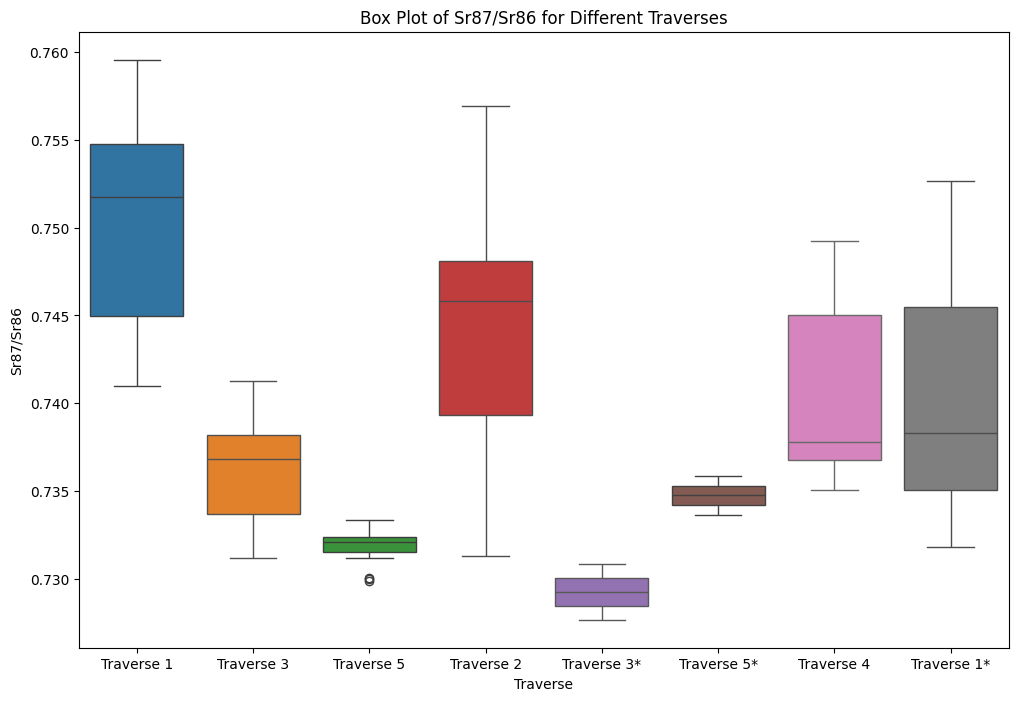

In [517]:
# Plot box plots of Sr87/Sr86 for different traverses
plt.figure(figsize=(12, 8))
# Create boxplot for each traverse
for traverse in df_copy['Traverse'].unique():
    sns.boxplot(x='Traverse', y='Sr87/Sr86', data=df_copy[df_copy['Traverse'] == traverse])

# Add title and labels
plt.title('Box Plot of Sr87/Sr86 for Different Traverses')
plt.xlabel('Traverse')
plt.ylabel('Sr87/Sr86')

# Show plot
plt.show()


In [518]:
#print(df_rain['Traverse'])  
# print Site A, B, C, D, E sample Ids for df_rain
df_rain_siteA = df_rain[df_rain['Traverse'] == 'Site A']
df_rain_siteB = df_rain[df_rain['Traverse'] == 'Site B']
df_rain_siteC = df_rain[df_rain['Traverse'] == 'Site C']
df_rain_siteD = df_rain[df_rain['Traverse'] == 'Site D']
df_rain_siteE = df_rain[df_rain['Traverse'] == 'Site E']

sites = ['Site A', 'Site B', 'Site C', 'Site D', 'Site E']


In [519]:
element_dict = ['Ca', 'Sr', 'Mg', 'Si', 'Na', 'Li', 'K', 'Al', 'Cl']


# Compute site-specific rain averages
site_means = {}
for site in sites:
    site_rain = df_rain[df_rain['Traverse'] == site]
    if not site_rain.empty:  # Only add sites with data
        site_means[site] = {
            'Cl_mM': site_rain['Cl_mM'].mean(),
            **{f'{element}_mM': site_rain[f'{element}_mM'].mean() for element in element_dict}
        }


In [520]:
# Rain Correction
# Equation is for an element X in the river water:
# X_corrected = X_observed - (Cl_river - Cl_river_star) * (X_rain/Cl_rain)
# Where Cl_river_star = Cl_river - Cl_rain
# Cl_river_star = 0 if Cl_river < Cl_rain


# Basic logic:
# Three Sites: C, D, E
# Calculate closest position of sample in df_copy to the site C, D, or E
# Proceed with the rain correction for each element in the sample, using the closest rain site to the sample
# List an element dictionary
# For each element in the dictionary, calculate the corrected value using the equation above
# Make sure to check if Cl_river < Cl_rain, if so, Cl_river_star = 0
# Add the corrected value to a new column in the df_copy dataframe

In [521]:
# Sites C, D, E
sites = ['Site A', 'Site B', 'Site C', 'Site D', 'Site E']

# Convert ppm to mM and store site-specific rain averages
for element in element_dict:
    df_rain[f'{element}_mM'] = df_rain[f'{element}_ppm'] / {'Ca': 40.08, 'Sr': 87.62, 'Mg': 24.31, 'Si': 28.09, 'Na': 22.99, 'Li': 6.94, 'K': 39.10, 'Al': 26.98, 'Cl': 35.453}[element]

# Compute site-specific rain averages
site_means = {}
for site in sites:
    site_rain = df_rain[df_rain['Traverse'] == site]
    if not site_rain.empty:  # Only add sites with data
        site_means[site] = {
            'Cl_mM': site_rain['Cl_mM'].mean(),
            **{f'{element}_mM': site_rain[f'{element}_mM'].mean() for element in element_dict}
        }


# Define function to calculate the closest rain site
def find_closest_site(row, df_rain):
    sample_coords = (row['Latitude'], row['Longitude'])
    df_rain['Distance'] = df_rain.apply(lambda rain_row: geodesic(sample_coords, (rain_row['Latitude'], rain_row['Longitude'])).kilometers, axis=1)
    closest_site = df_rain.loc[df_rain['Distance'].idxmin(), 'Traverse']
    return closest_site

# Add closest site information to df_copy
df_copy['Closest_Site'] = df_copy.apply(find_closest_site, axis=1, df_rain=df_rain)

# Define function to calculate rain correction
def rain_correction(row, site_means, element_dict):
    closest_site = row['Closest_Site']
    if closest_site not in site_means:
        raise ValueError(f"Closest site '{closest_site}' not found in site_means.")

    site_data = site_means[closest_site]
    corrected_values = {}
    for element in element_dict:
        Cl_river = row['Cl_mM']
        Cl_rain = site_data['Cl_mM']
        X_rain = site_data[f'{element}_mM']

        # Calculate Cl_river_star
        Cl_river_star = max(Cl_river - Cl_rain, 0)

        # Calculate X_corrected
        X_corrected = row[f'{element}_mM'] - (Cl_river - Cl_river_star) * (X_rain / Cl_rain)
        corrected_values[f'{element}_mM_*'] = X_corrected

    return pd.Series(corrected_values)


# Apply rain correction
df_corrected = df_copy.apply(rain_correction, axis=1, site_means=site_means, element_dict=element_dict)

# Merge corrected values back into df_copy
df_copy = pd.concat([df_copy, df_corrected], axis=1)

print(df_copy)

     Sample ID     GNS  Season       Date      Time   Sample type  \
2    Nep24-013     NaN  Sep_24 2024-09-07  09:46:06   Groundwater   
47   Nep24-001   S1d24  Sep_24 2024-09-05  15:59:49        Spring   
48   Nep24-002   S1a24  Sep_24 2024-09-05  16:49:06        Spring   
49   Nep24-003   S1b24  Sep_24 2024-09-05  17:20:50        Spring   
50   Nep24-009     NaN  Sep_24 2024-09-06  08:17:51        Spring   
..         ...     ...     ...        ...       ...           ...   
264   NEP23-32  S4z23'  Apr_23 2023-04-17  11:50:00  Spring water   
265   NEP23-33  S4s23'  Apr_23 2023-04-18  10:12:00  Spring water   
266   NEP23-34  S4m23'  Apr_23 2023-04-18  11:34:00  Spring water   
267   NEP23-35  S1j23'  Apr_23 2023-04-18  17:24:00  Spring water   
268   NEP23-36  S1f23'  Apr_23 2023-04-18  17:48:00  Spring water   

    Repeat_collection                                       Site_details  \
2                 NaN  Borehole wate sludge.  Very hard to filter.  N...   
47                N

In [522]:
# Order samples by Cl_mM_* in descending order
ordered_samples = df_copy.sort_values('Cl_mM_*', ascending=False)

# Find a valid sample where all required X/Cl ratios can be computed
X_Cl_ratios = {}
for _, sample in ordered_samples.iterrows():
    is_valid = True
    ratios = {}
    for element in element_dict:
        # Check for valid Cl and element_mM_* values
        if sample['Cl_mM_*'] > 0 and not pd.isna(sample[f'{element}_mM_*']):
            ratios[element] = sample[f'{element}_mM_*'] / sample['Cl_mM_*']
        else:
            is_valid = False
            break  # If any value is invalid, skip this sample
    
    if is_valid:
        X_Cl_ratios = ratios
        break  # Stop as soon as a valid sample is found

# If no valid sample is found, raise an error or handle it gracefully
if not X_Cl_ratios:
    raise ValueError("No valid sample found for X/Cl ratio calculation.")

print("X/Cl Ratios:", X_Cl_ratios)

# Define the new correction function
def evaporite_correction(row, element_dict, X_Cl_ratios):
    evaporite_corrected_values = {}
    for element in element_dict:
        # Perform the evaporite correction
        X_corrected = row[f'{element}_mM_*']
        Cl_corrected = row['Cl_mM_*']
        X_evaporite_corrected = X_corrected - (X_Cl_ratios[element] * Cl_corrected)
        evaporite_corrected_values[f'{element}_mM_EC'] = X_evaporite_corrected

    return pd.Series(evaporite_corrected_values)

# Apply the evaporite correction
df_evaporite_corrected = df_copy.apply(evaporite_correction, axis=1, element_dict=element_dict, X_Cl_ratios=X_Cl_ratios)

# Merge evaporite-corrected values back into df_copy
df_copy = pd.concat([df_copy, df_evaporite_corrected], axis=1)


X/Cl Ratios: {'Ca': 0.41735569444323306, 'Sr': 0.0015173814010333803, 'Mg': 0.2918610003523339, 'Si': 0.7021082530031759, 'Na': 0.6975619929339737, 'Li': 4.148506057103098e-05, 'K': 0.1447739947492531, 'Al': 0.0001898854392169677, 'Cl': 1.0}


In [523]:
print(df_copy.columns)

Index(['Sample ID', 'GNS', 'Season', 'Date', 'Time', 'Sample type',
       'Repeat_collection', 'Site_details', 'Traverse', 'Traverse_new',
       ...
       'Cl_mM_*', 'Ca_mM_EC', 'Sr_mM_EC', 'Mg_mM_EC', 'Si_mM_EC', 'Na_mM_EC',
       'Li_mM_EC', 'K_mM_EC', 'Al_mM_EC', 'Cl_mM_EC'],
      dtype='object', length=105)


In [524]:
# set negative values in df_copy of the elements _mM_EC to NaN
df_copy.loc[df_copy['Ca_mM_EC'] < 0, 'Ca_mM_EC'] = np.nan
df_copy.loc[df_copy['Sr_mM_EC'] < 0, 'Sr_mM_EC'] = np.nan
df_copy.loc[df_copy['Mg_mM_EC'] < 0, 'Mg_mM_EC'] = np.nan
df_copy.loc[df_copy['Si_mM_EC'] < 0, 'Si_mM_EC'] = np.nan
df_copy.loc[df_copy['Na_mM_EC'] < 0, 'Na_mM_EC'] = np.nan
df_copy.loc[df_copy['Li_mM_EC'] < 0, 'Li_mM_EC'] = np.nan
df_copy.loc[df_copy['K_mM_EC'] < 0, 'K_mM_EC'] = np.nan
df_copy.loc[df_copy['Al_mM_EC'] < 0, 'Al_mM_EC'] = np.nan
df_copy.loc[df_copy['Cl_mM_EC'] < 0, 'Cl_mM_EC'] = np.nan



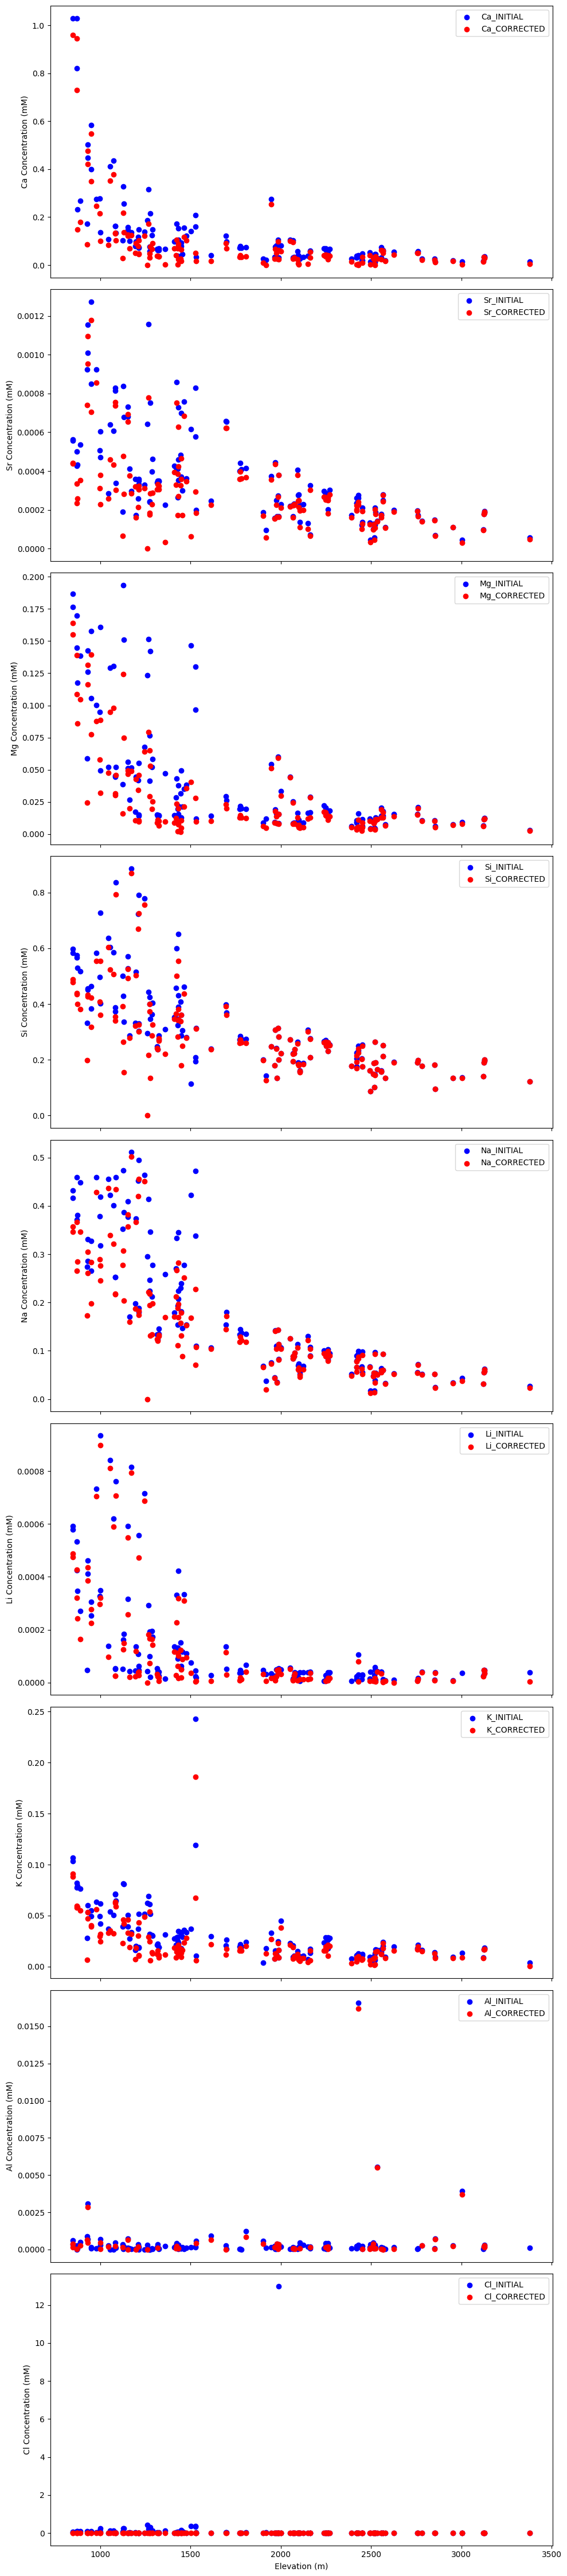

In [525]:

# Filter the DataFrame to include only rows where 'Cl_mM' is not NaN
df_copy = df_copy[df_copy['Cl_molar'].notna()]

# Create a figure and axes for the plots
fig, axs = plt.subplots(len(element_dict), 1, figsize=(10, len(element_dict) * 5), sharex=True)

# Loop through each element and create a scatter plot
for i, element in enumerate(element_dict):
    ax = axs[i]
    ax.scatter(df_copy['Elevation'], df_copy[f'{element}_mM'], label=f'{element}_INITIAL', color='blue')
    ax.scatter(df_copy['Elevation'], df_copy[f'{element}_mM_EC'], label=f'{element}_CORRECTED', color='red')
    ax.set_ylabel(f'{element} Concentration (mM)')
    ax.legend()

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Elevation (m)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
plt.close()

In [526]:
# save df_copy to a new excel file
#df_copy.to_excel('Corrected_Spring_Data.xlsx', index=False)

In [527]:

season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'red',
    'Sep_24': 'purple'
}

traverse_markers = {
    'Traverse 1': 's',  # Square
    'Traverse 2': 'v',  # Triangle
    'Traverse 3': '*',  # Star
    'Traverse 3*' : '*',  # Star
    'Traverse 4': 'o',   # Circle
    'Traverse 5': 'D',   # Diamond
    'Traverse 5*': 'D'   # Diamond
}

# Define custom colors for traverses
custom_colors = {
    'Traverse 1': '#A385CA',  # Add '#' prefix
    'Traverse 2': '#FDD37E',  
    'Traverse 3': '#9FADDA',  
    'Traverse 3*': '#9FADDA',  
    'Traverse 4': '#1A5AA0',  
    'Traverse 5': '#01316B',  
    'Traverse 5*': '#01316B'  
}

site_markers = {
    'Site A': 'o',  
    'Site B': 'v',
    'Site C': '*',
    'Site D': 's',
    'Site E': 'D',
    'Site F': 'X',
}


tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']


GNS_markers = {
    'S1': 'o',  
    'S2': 'o',  
    'S3': 'o',  
    'S4': 'o'   
}







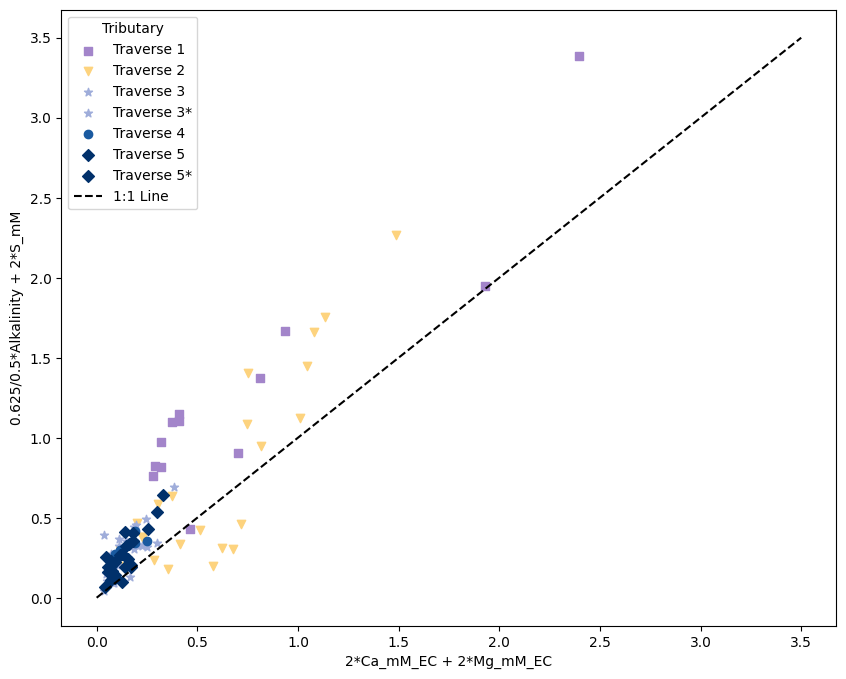

In [528]:
# plot 2*Ca_mM_EC + 2*Mg_mM_EC vs (0.625/0.5) * Alkalinity + 2*S_mM

df_copy['S_mM'] = df_copy['S_ppm'] / 32.06

# Calculate the required values
df_copy['2*Ca_mM'] = df_copy['Ca_mM'] * 2
df_copy['2*Mg_mM'] = df_copy['Mg_mM'] * 2
df_copy['0.625/0.5*Alkalinity'] = df_copy['Alkalinity'] * 0.625 / 0.5 / 1000
df_copy['2*S_mM'] = df_copy['S_mM'] * 2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data

for traverse in tributaries:
    ax.scatter(df_copy[df_copy['Traverse'] == traverse]['2*Ca_mM'] + df_copy[df_copy['Traverse'] == traverse]['2*Mg_mM'],
               df_copy[df_copy['Traverse'] == traverse]['0.625/0.5*Alkalinity'] + df_copy[df_copy['Traverse'] == traverse]['2*S_mM'],
               label=traverse,
               color=custom_colors[traverse],
               marker=traverse_markers[traverse])


# Add a 1:1 line between 0,0 and 3.5,3.5
ax.plot([0, 3.5], [0, 3.5], color='black', linestyle='--', label='1:1 Line')


# Add labels and legend
ax.set_xlabel('2*Ca_mM_EC + 2*Mg_mM_EC')
ax.set_ylabel('0.625/0.5*Alkalinity + 2*S_mM')
ax.legend(title='Tributary')

# Display the plot
plt.show()

# Just shows not much carbonate precipitation as the parameters are not very charge balanced

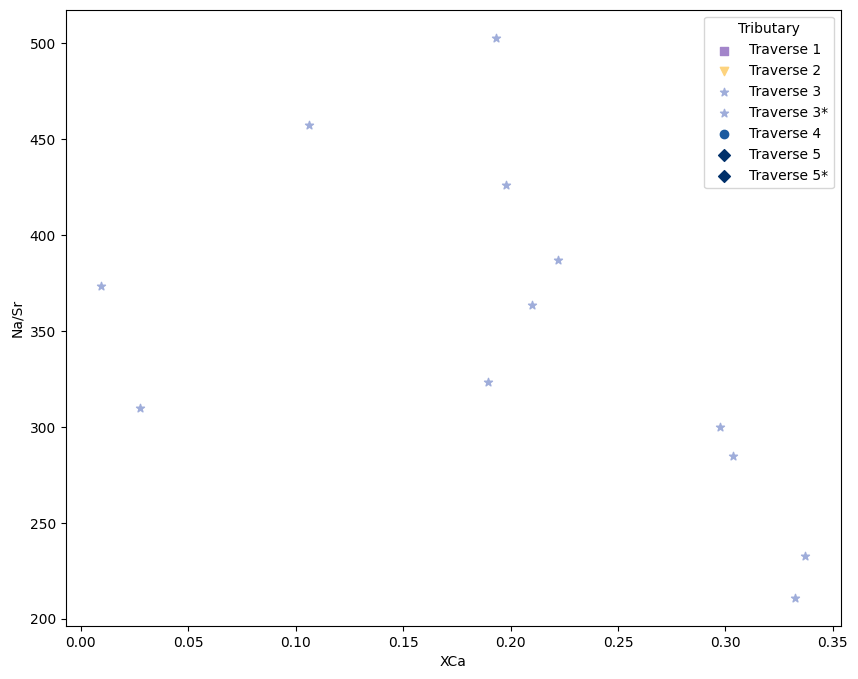

In [529]:
# plot Na/Sr against XCa = Ca/sum of cations

df_copy['Na/Sr_EC'] = df_copy['Na_mM_EC'] / df_copy['Sr_mM_EC']

df_copy['XCa'] = df_copy['Ca_mM_EC'] / (df_copy['Ca_mM_EC'] + df_copy['Mg_mM_EC'] + df_copy['Na_mM_EC'] + df_copy['K_mM_EC'] + df_copy['Li_mM_EC'] + df_copy['Al_mM_EC'] + df_copy['Sr_mM_EC'])


plt.figure(figsize=(10, 8))

#df_filtered for Traverse 3
df_filtered = df_copy[df_copy['Traverse'] == 'Traverse 3']

for traverse in tributaries:
    plt.scatter(df_filtered[df_filtered['Traverse'] == traverse]['XCa'],
                df_filtered[df_filtered['Traverse'] == traverse]['Na/Sr_EC'],
                label=traverse,
                color=custom_colors[traverse],
                marker=traverse_markers[traverse])
    
plt.xlabel('XCa')
plt.ylabel('Na/Sr')
plt.legend(title='Tributary')
plt.show()
    
    

# Making the DEM


In [530]:
## ADDING DEM DATA TO THE PLOT
    
dem_path = '/Users/enrico/Desktop/Part III Project/DEM/AP_23217_PLR_F0550_RT1/AP_23217_PLR_F0550_RT1.dem.tif'

    
# Define UTM bounds for Nepal DEM
min_x, min_y, max_x, max_y = 346873.46875, 3078339.0, 362335.96875, 3115539.0


# Define UTM bounds for Nepal DEM
# Set CRS WKT strings
utm_45n_wkt = 'PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",' \
            'SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],' \
            'AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],' \
            'UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],' \
            'PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],' \
            'PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],' \
            'PARAMETER["false_easting",500000],PARAMETER["false_northing",0],' \
            'UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32645"]]'

wgs84_wkt = 'GEOGCS["WGS 84",DATUM["WGS_1984",' \
            'SPHEROID["WGS 84",6378137,298.257223563],' \
            'AUTHORITY["EPSG","6326"]],' \
            'PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],' \
            'AUTHORITY["EPSG","4326"]]'

In [531]:
# Open the DEM file and set CRS to UTM Zone 45N if undefined
with rasterio.open(dem_path) as dem_raster:
    src_crs = rasterio.crs.CRS.from_wkt(utm_45n_wkt)  # Using WKT for UTM Zone 45N
    dst_crs = rasterio.crs.CRS.from_wkt(wgs84_wkt)    # Using WKT for WGS84

    # Create a Shapely box with UTM bounds
    dem_box = box(min_x, min_y, max_x, max_y)

    # Mask DEM data to these bounds
    out_image, out_transform = mask(dem_raster, [dem_box], crop=True)
    clipped_dem_array = out_image[0]

    # Calculate transform and reproject to WGS84
    dst_transform, width, height = calculate_default_transform(
        src_crs, dst_crs, clipped_dem_array.shape[1], clipped_dem_array.shape[0], *[min_x, min_y, max_x, max_y]
    )

    dst_array = np.zeros((height, width), dtype=np.float32)
    reproject(
        source=clipped_dem_array,
        destination=dst_array,
        src_transform=out_transform,
        src_crs=src_crs,
        dst_transform=dst_transform,
        dst_crs=dst_crs,
        resampling=Resampling.bilinear
    )

    dst_array[dst_array < 0] = np.nan  # Filter out elevation values below 0

# Define bounds in WGS84 (latitude/longitude) for plotting
bounds = (
    dst_transform.c,  # min longitude
    dst_transform.f + dst_transform.e * height,  # min latitude
    dst_transform.c + dst_transform.a * width,  # max longitude
    dst_transform.f  # max latitude
)


In [532]:
# Generate the x and y coordinates in WGS84
x = np.linspace(bounds[0], bounds[2], dst_array.shape[1])
y = np.linspace(bounds[1], bounds[3], dst_array.shape[0])
x, y = np.meshgrid(x, y)
z = dst_array

# Interpolator for DEM elevations
interpolator = RegularGridInterpolator((y[:, 0], x[0, :]), z, bounds_error=False, fill_value=np.nan)

# Ensure the DataFrame coordinates are in the same CRS as the DEM
df_lons = df_copy['Longitude'].values
df_lats = df_copy['Latitude'].values

# Load the shapefile
shapefile_path1 = "/Users/enrico/Desktop/Part III Project/DEM/Clipped_Shp_Melamchi.shp"
gdf = gpd.read_file(shapefile_path1)



In [533]:
######### IMPORTING DATA FOR GEOLOGY OVERLAY #########

# Load the shapefile
shapefile_path2 = "/Users/enrico/Desktop/Part III Project/QGIS during Fieldwork/geometry5.shp"
gdf2 = gpd.read_file(shapefile_path2)

    

In [534]:
#For Shapefile
    # Define color mapping based on ID
id_to_color = {
    0: 'Blue',
    1: 'Green',
    2: 'Yellow',
    3: 'Orange',
    5: 'Purple',
    }

id_to_label = {
    0: 'Talamarang Formation',
    1: 'Gyalthum Formation',
    2: 'Bolde Quartzite',
    3: 'Timbung Formation',
    5: 'Golphu Formation',
    }

In [535]:
season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'red',
    'Sep_24': 'purple'
}

traverse_markers = {
    'Traverse 1': 's',  # Square
    'Traverse 2': 'v',  # Triangle
    'Traverse 3': '*',  # Star
    'Traverse 3*' : '*',  # Star
    'Traverse 4': 'o',   # Circle
    'Traverse 5': 'D',   # Diamond
    'Traverse 5*': 'D'   # Diamond
}


tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']


GNS_markers = {
    'S1': 'o',  
    'S2': 'o',  
    'S3': 'o',  
    'S4': 'o'   
}





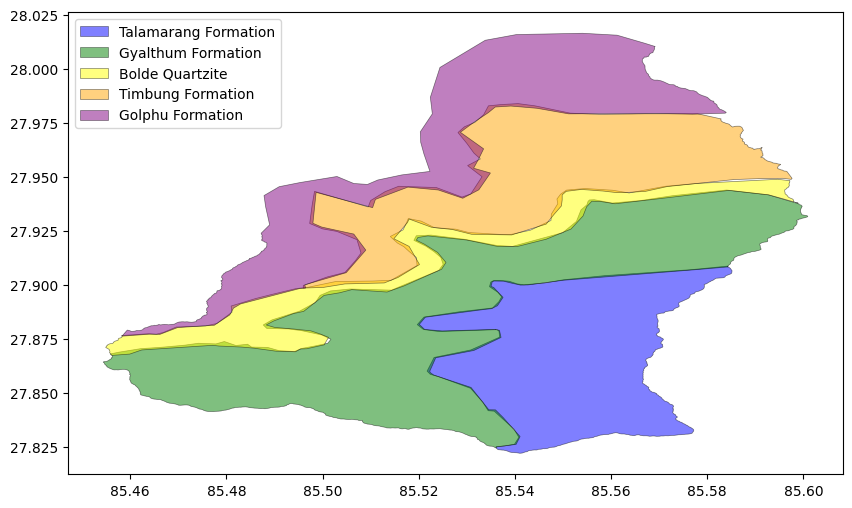

In [536]:
# Define the desired CRS, for example, "EPSG:4326" for WGS 84 or any other projection you need.
desired_crs = "EPSG:4326"

# Reproject the GeoDataFrame to the desired CRS
gdf2 = gdf2.to_crs(desired_crs)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the overlay shapefile with specified colors and labels
plotted_labels = set()  # Keeps track of which labels have been plotted
for geom, id_value in zip(gdf2.geometry, gdf2['id']):
    color = id_to_color.get(id_value, 'grey')  # Default to grey if ID is not in the mapping
    label = id_to_label.get(id_value, '')
    
    if isinstance(geom, Polygon):  # Check if geometry is a Polygon
        x_poly, y_poly = geom.exterior.xy  # Get exterior coordinates
        if label not in plotted_labels:
            ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
            plotted_labels.add(label)
        else:
            ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
    
    elif isinstance(geom, MultiPolygon):  # Check if geometry is a MultiPolygon
        for part in geom.geoms:  # Iterate over constituent polygons
            x_poly, y_poly = part.exterior.xy
            if label not in plotted_labels:
                ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
                plotted_labels.add(label)
            else:
                ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)

# Add legend, title, etc., as needed
ax.legend()
plt.show()


# One Traverse Plot

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/2

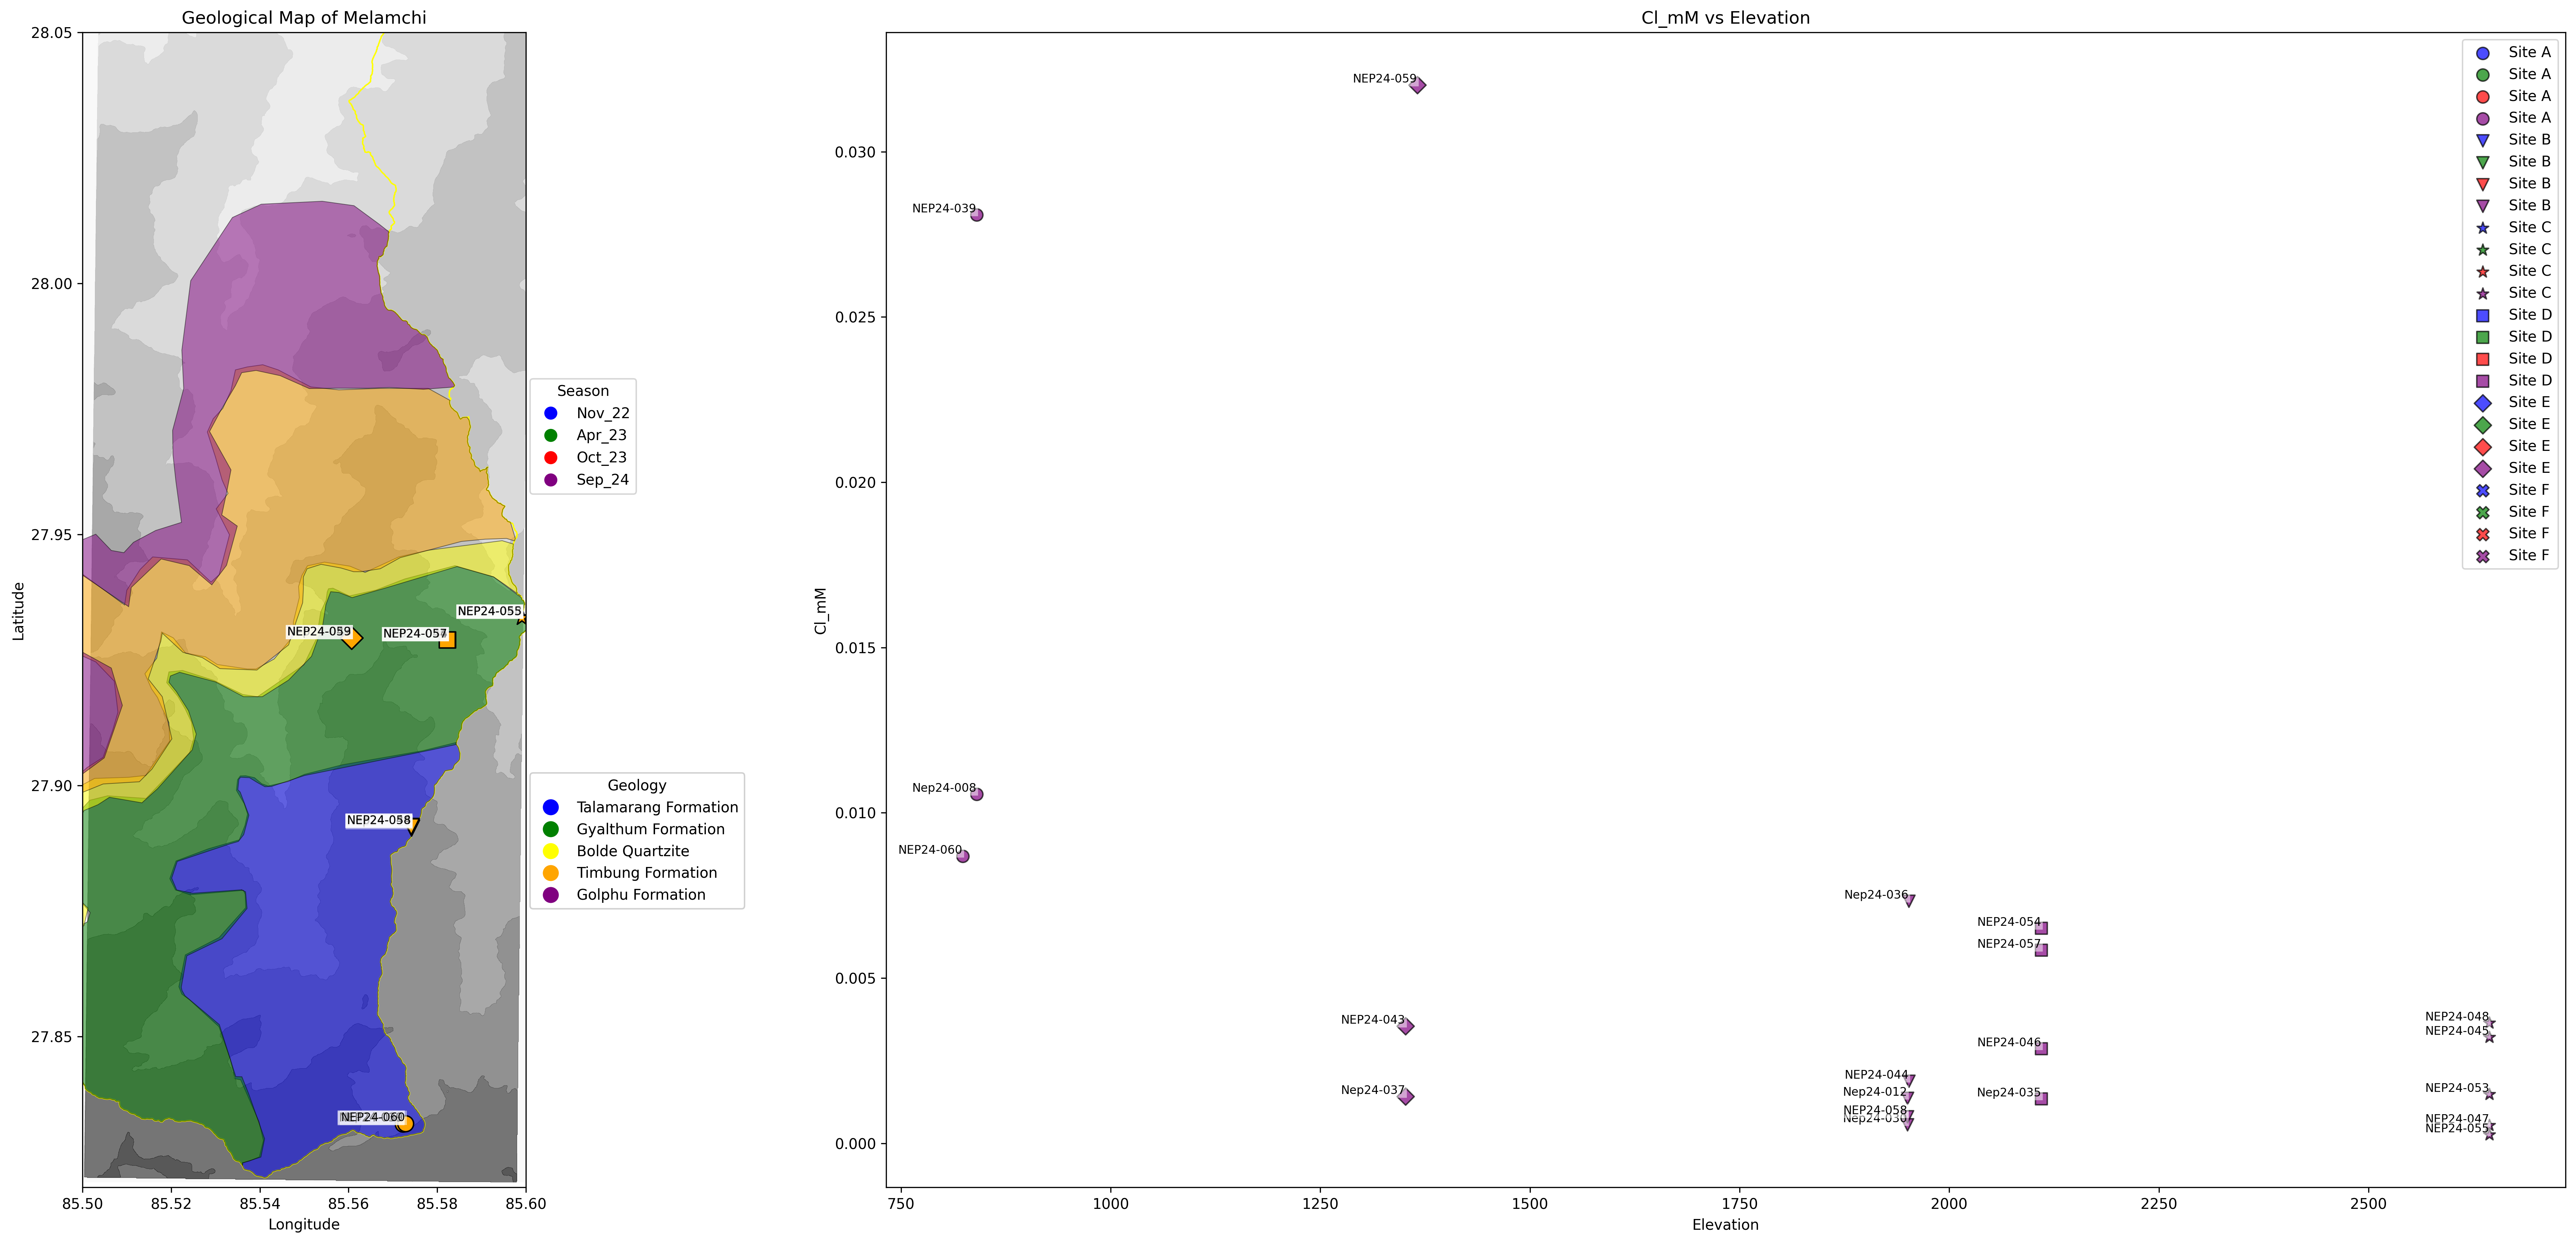

In [537]:

# Create the figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(30, 12), dpi = 300)

# Define the variables and traverses
variables = ['Cl_mM', 'Elevation']
tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']

GNS_markers = ['S1', 'S2', 'S3', 'S4']



ax1 = axs[0]
ax2 = axs[1]



# Plot the DEM data in grayscale on ax1
c = ax1.contourf(x, y, z, cmap='Greys', alpha=0.7)


# Overlay the shapefile for watershed boundary
gdf.plot(ax=ax1, facecolor='none', edgecolor='yellow', alpha=1, linewidth=1, label='Melamchi Watershed')

# Overlay gdf2 on ax1 with specified colors and labels
plotted_labels = set()  # Keeps track of which labels have been plotted
geology_handles = []  # Handles for individual geology legend next to ax1
for geom, id_value in zip(gdf2.geometry, gdf2['id']):
    color = id_to_color.get(id_value, 'grey')  # Default to grey if ID is not in the mapping
    label = id_to_label.get(id_value, '')
    
    if isinstance(geom, Polygon):
        x_poly, y_poly = geom.exterior.xy
        ax1.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
        if label not in plotted_labels:
            plotted_labels.add(label)
            geology_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label))
    elif isinstance(geom, MultiPolygon):
        for part in geom.geoms:
            x_poly, y_poly = part.exterior.xy
            ax1.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
            if label not in plotted_labels:
                plotted_labels.add(label)
                geology_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label))

cl_min = df_rain[variables[0]].min()
cl_max = df_rain[variables[0]].max()

#filter so that df_copy only contains Sample IDs that start with NEP22:
df_filtered = df_rain.dropna(subset=['Traverse'])

#print(df_filtered['Traverse'])
#df_filtered = df_filtered[df_filtered['Traverse'].str.startswith('Traverse 3')]



for site, marker in site_markers.items():
    site_data = df_filtered[df_filtered['Traverse'] == site]
    ax1.scatter(
        site_data['Longitude'], site_data['Latitude'], s=120, cmap='viridis', alpha=1, 
        edgecolor='k', marker=marker, label=f'{site} - Nep24', color='orange'
    )
    
    # # Add SampleID labels
    for i, row in site_data.iterrows():
        ax1.text(row['Longitude'], row['Latitude'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))
    
# #plot abra samples as red rectangles
# ax1.scatter(df_abra['Longitude'], df_abra['Latitude'], color='red', s=200, alpha=1, edgecolor='k', marker='s', label='Abra Samples')        

# for i, row in df_abra.iterrows():
#     ax1.text(row['Longitude'], row['Latitude'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


        
        
# Add a colorbar to ax1 using the scatter plot variable `c`
#cbar = plt.colorbar(c, ax=ax1, location='right', pad=0.2)


# Create a legend for the seasons in ax1
season_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=season) 
    for season, color in season_colors.items()
]

# # Set map limits for ax1
ax1.set_xlim(85.5, 85.6)
ax1.set_ylim(27.82, 28.05)

# ax1.set_xlim(85.54, 85.60)
# ax1.set_ylim(27.90, 27.95)


kyul_data = pd.DataFrame({
    'Latitude': [27.932942],
    'Longitude': [85.563408],
    'Label': ['KYUL']
})



thalo_data = pd.DataFrame({
    'Latitude': [27.928879],
    'Longitude': [85.585605],
    'Label': ['THALO']
})

# ax1.scatter(
#     kyul_data['Longitude'], kyul_data['Latitude'],
#     color='red', s=200, alpha=1, edgecolor='k', marker='o', label=kyul_data['Label'][0]
# )

# ax1.scatter(
#     thalo_data['Longitude'], thalo_data['Latitude'],
#     color='blue', s=200, alpha=1, edgecolor='k', marker='o', label=thalo_data['Label'][0]
# )

# BK sampling site: 27.871276N, 85.542173E
bk_data = pd.DataFrame({
    'Latitude': [27.871276],
    'Longitude': [85.542173],
    'Label': ['BK']
})

# ax1.scatter(
#     bk_data['Longitude'], bk_data['Latitude'],
#     color='green', s=200, alpha=1, edgecolor='k', marker='o', label=bk_data['Label'][0]
# )


# Labels and title for ax1
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
#ax1.set_title(f'DEM Map with {variables[1]} Samples for {traverse}')
ax1.set_title('Geological Map of Melamchi')
season_legend = ax1.legend(handles=season_handles, title='Season', loc='upper left', bbox_to_anchor=(1.01, 0.7),
    borderaxespad=0.)

# Place the geology legend to the right of ax1
geology_legend = ax1.legend(
    handles=geology_handles, 
    title='Geology', 
    loc='center left', 
    bbox_to_anchor=(1.01, 0.3),
    borderaxespad=0.
)

# Add both legends to the plot
ax1.add_artist(geology_legend)
ax1.add_artist(season_legend)

for site, marker in site_markers.items():
    
    site_data = df_filtered[df_filtered['Traverse'] == site]

    for season, color in season_colors.items():
        season_data = site_data[site_data['Season'] == season]
        ax2.scatter(
            season_data[variables[1]], season_data[variables[0]], 
            c=color, s=70, alpha=0.7, edgecolor='k', 
            marker=marker, label=site
        )
        for i, row in season_data.iterrows():
             ax2.text(row[variables[1]], row[variables[0]], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


ax2.set_xlabel(f'{variables[1]}')
ax2.set_ylabel(f'{variables[0]}')
#ax2.set_xscale('log')
ax2.set_title(f'{variables[0]} vs {variables[1]}')
ax2.legend()


# Adjust layout and save    
plt.tight_layout()
plt.savefig('Cl_correct.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

In [538]:
# create a special df with only sites C,D,E on rain_df traverses
df_rain_copy = df_rain.copy()


df_rain_copy = df_rain_copy[df_rain_copy['Traverse'].isin(['Site C', 'Site D', 'Site E'])]

# Filter to remove NEP24-059
df_rain_copy = df_rain_copy[df_rain_copy['Sample ID'] != 'NEP24-059']

In [539]:
df_rain_copy


,Sample ID,GNS,Season,Date,Time,Sample type,Repeat_collection,Site_details,Traverse,Traverse_new,...,K_mM,Al_mM,Li_uM,Sr_mM,Cl_mM,Ca/Na,Mg/Na,Ca/Sr,1000xSr/Ca,Distance
27,Nep24-035,NaN,Sep_24,2024-09-10,11:30:48,Rain,NaN,Rain,Site D,Site D,...,0.001486,0.000259,0.032421,0.000024,0.001343,7.784902,0.671246,1388.583456,0.720158,9.761925
29,Nep24-037,NaN,Sep_24,2024-09-10,15:18:10,Rain,NaN,"Rain, sample sitting there 4 nights, very hot....",Site E,Site E,...,0.010086,0.000266,0.025072,0.000011,0.00142,19.352524,6.560072,1098.363456,0.910445,9.900650
31,NEP24-043,NaN,Sep_24,2024-09-12,10:53:50,Rain,NaN,"Kyul rain sample, bottles A & B (comp), 2 nigh...",Site E,Site E,...,0.004643,0.000104,0.012968,0.000012,0.003551,3.539066,0.262274,1381.519303,0.723841,9.900577
33,NEP24-045,NaN,Sep_24,2024-09-12,14:30:45,Rain,NaN,"2 night’s rain at eco lodge. Bottles A&B, no c...",Site C,Site C,...,0.001202,0.000068,0.026513,0.000008,0.003213,1.937995,0.283543,519.547866,1.924750,10.490916
34,NEP24-046,NaN,Sep_24,2024-09-12,14:46:37,Rain,NaN,"12/9 2 nights of rain, two bottles",Site D,Site D,...,0.001851,0.000473,0.027522,0.000018,0.002858,5.395046,0.432842,1458.071585,0.685837,9.761410
35,NEP24-047,NaN,Sep_24,2024-09-12,15:05:07,Rain,NaN,"30min rain event, Samples A&B, no contamination",Site C,Site C,...,0.004850,0.000387,0.049568,0.000010,0.000548,2.945541,0.279813,1001.962652,0.998041,10.491411
36,NEP24-048,NaN,Sep_24,2024-09-12,16:20:26,Rain,NaN,1hr rain event,Site C,Site C,...,0.005441,0.000169,0.038617,0.000010,0.003645,1.237079,0.093615,644.616755,1.551309,10.491249
37,NEP24-053,NaN,Sep_24,2024-09-14,09:30:58,Rain,NaN,Rain sample averaged over 2 nights (of light r...,Site C,Site C,...,0.002528,0.000259,0.032277,0.000010,0.001485,3.523455,0.247332,1043.203998,0.958585,10.491495
38,NEP24-054,NaN,Sep_24,2024-09-14,15:30:59,Rain,NaN,"2 bottles combined, 2 nights of rain",Site D,Site D,...,0.002132,0.000568,0.025648,0.000025,0.006508,7.760277,0.470992,1557.510400,0.642050,9.761942
39,NEP24-055,NaN,Sep_24,2024-09-14,17:15:59,Rain,NaN,NaN,Site C,Site C,...,0.007475,0.000223,0.062968,0.000016,0.000257,4.932989,0.227533,1556.619019,0.642418,10.483900


In [540]:
# average Cl concentration for each site
df_rain_copy.groupby('Traverse')['Cl_mM'].mean()

# Average of all of them
df_rain_copy['Cl_mM'].mean()

np.float64(0.00278796829605393)

# Ion Plots


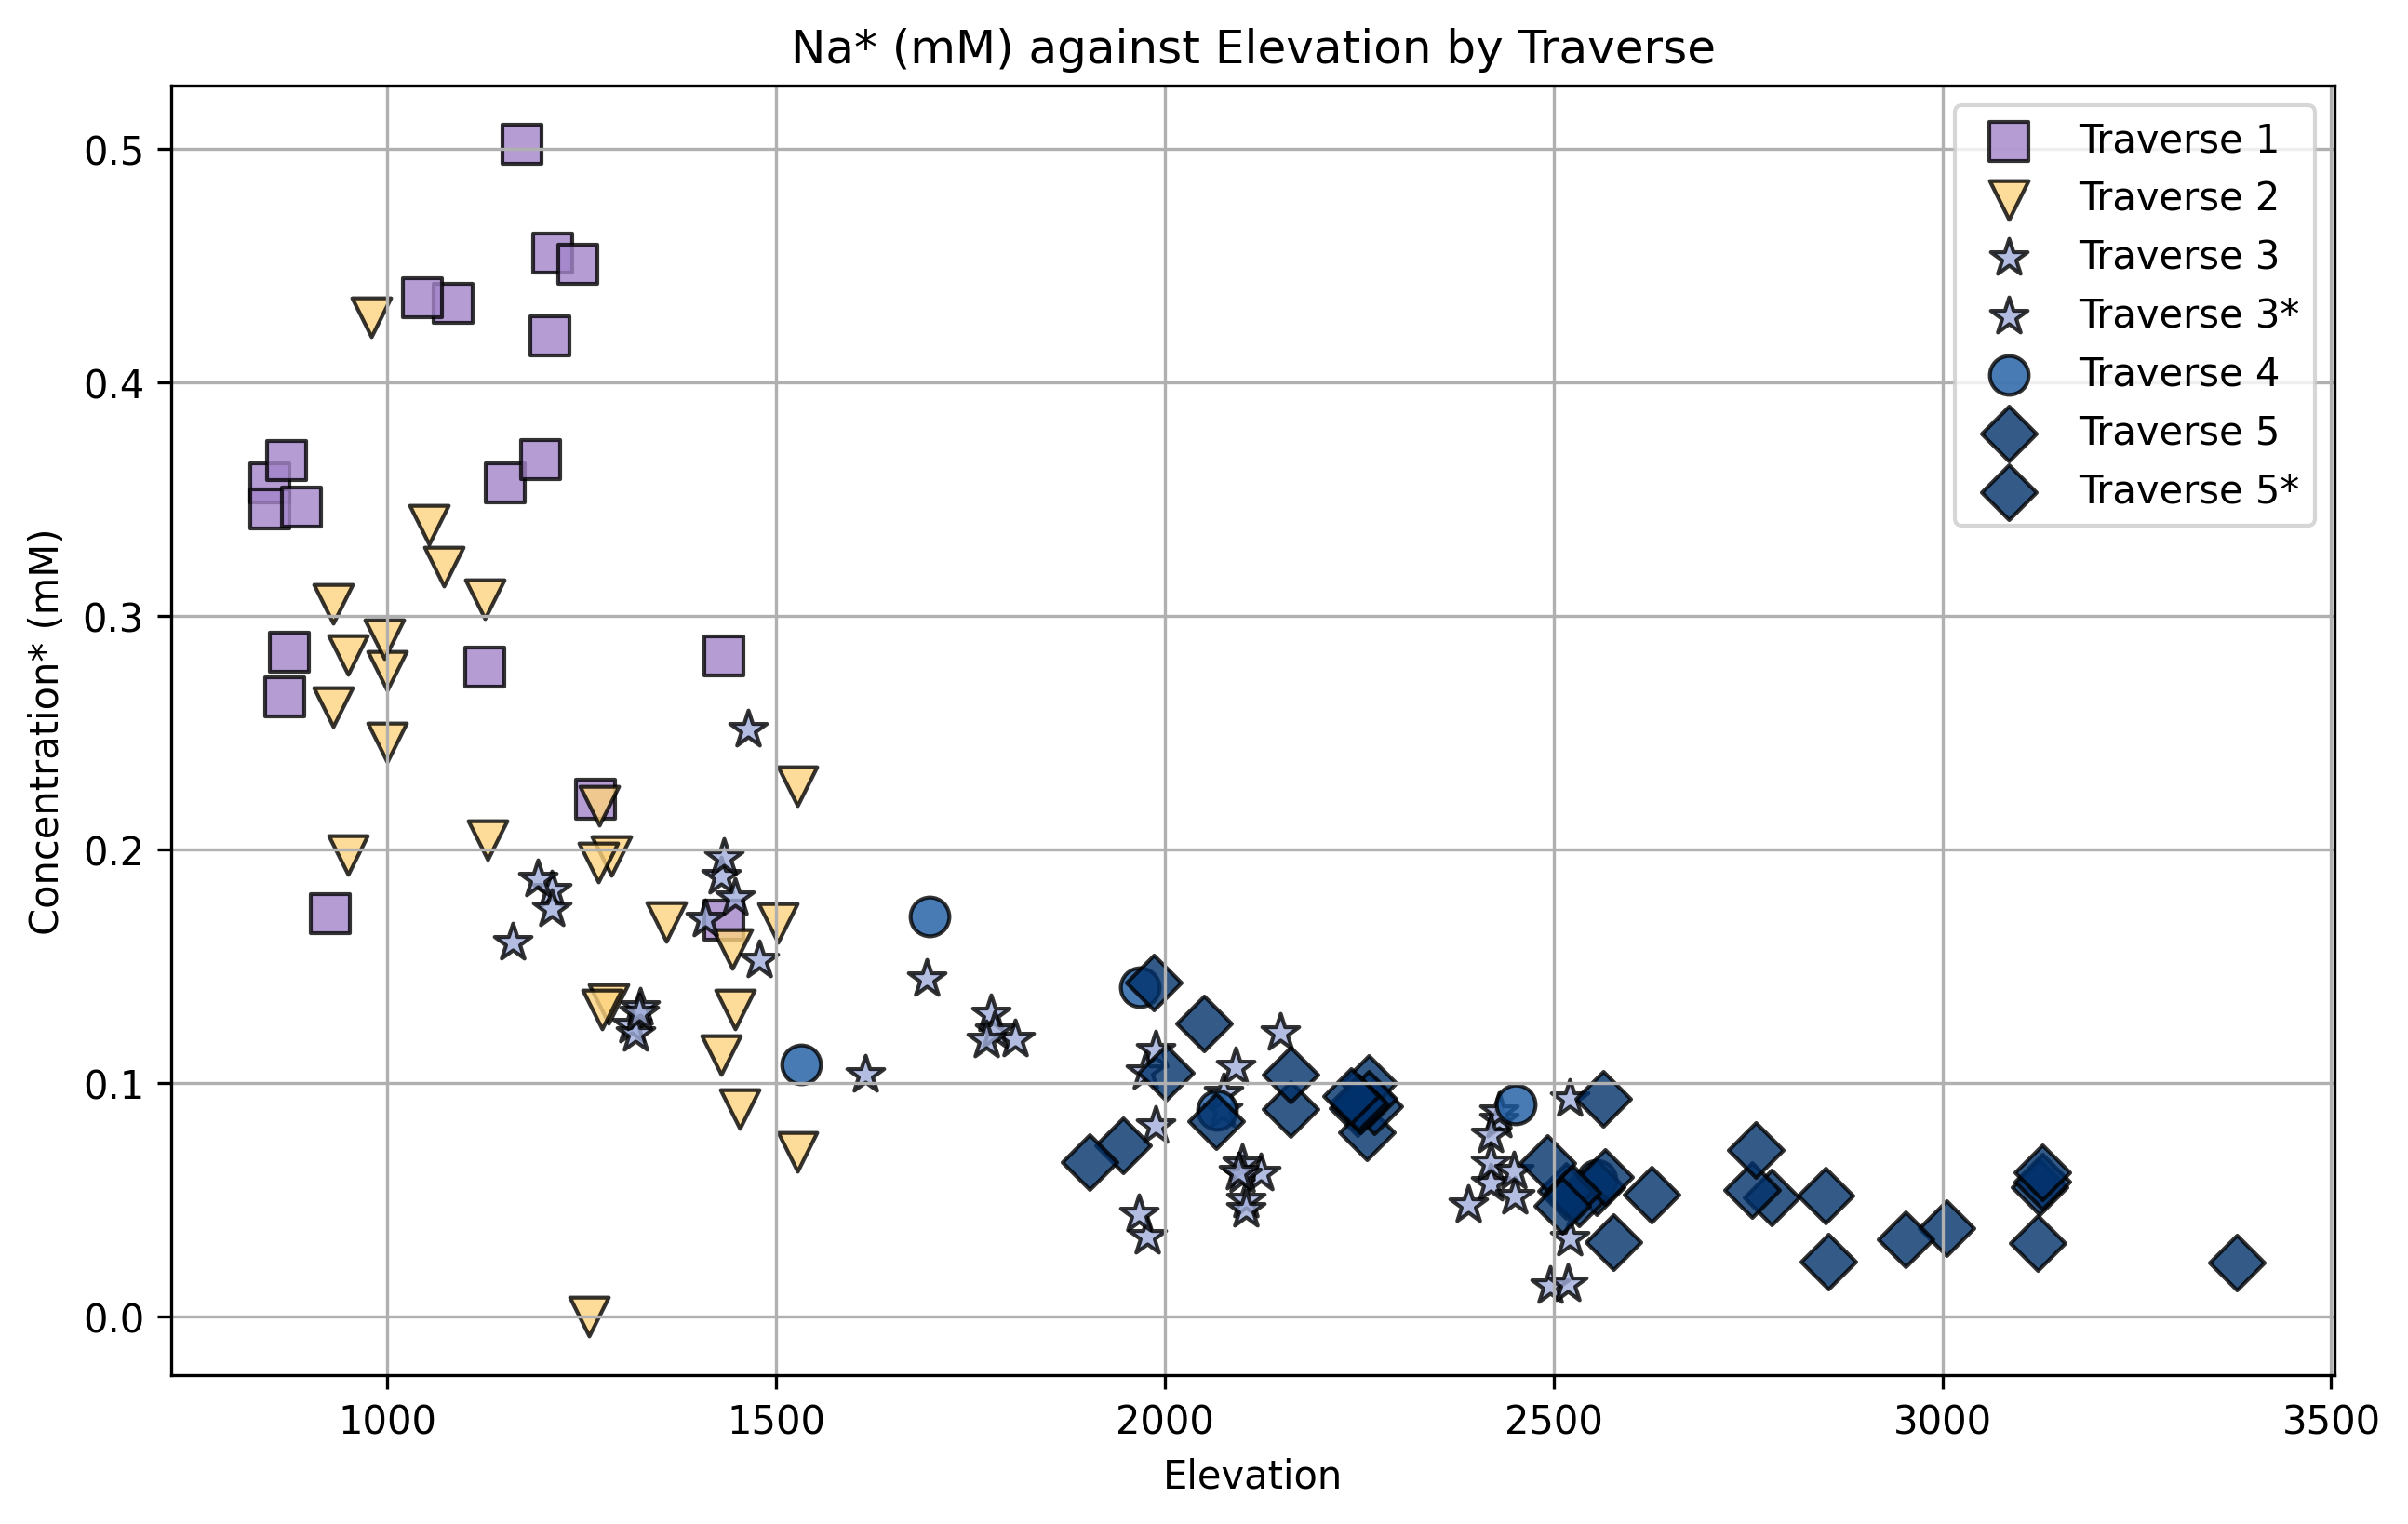

In [541]:
# plot Na and Si mM EC against Elevation coloured by Traverse

import matplotlib.pyplot as plt

# Plot Na and Si (in mM EC) against Elevation, colored by Traverse
plt.figure(figsize=(10, 6), dpi=300)

for traverse, marker in traverse_markers.items():
    # Filter data for the current traverse
    traverse_data = df_copy[df_copy['Traverse'] == traverse]
    
    # Get color for the current traverse
    color = custom_colors.get(traverse, 'black')  # Default to black if color not specified
    
    # Plot Na against Elevation
    plt.scatter(
        traverse_data['Elevation'], traverse_data['Na_mM_EC'], 
        label=f'{traverse}', alpha=0.8, edgecolor='k', 
        marker=marker, s=100, color=color
    )
    
    # # Plot Si against Elevation
    # plt.scatter(
    #     traverse_data['Elevation'], traverse_data['Si_mM_EC'], 
    #     label=f'{traverse} - Si', alpha=0.8, edgecolor='k', 
    #     marker=marker, s=100, color=color, linestyle='dotted'
    # )

# Add plot labels, title, legend, and grid
plt.xlabel('Elevation')
plt.ylabel('Concentration* (mM)')
plt.title('Na* (mM) against Elevation by Traverse')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/3078408405.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traverse_data['Na/Si'] = traverse_data['Na_mM'] / traverse_data['Si_mM']


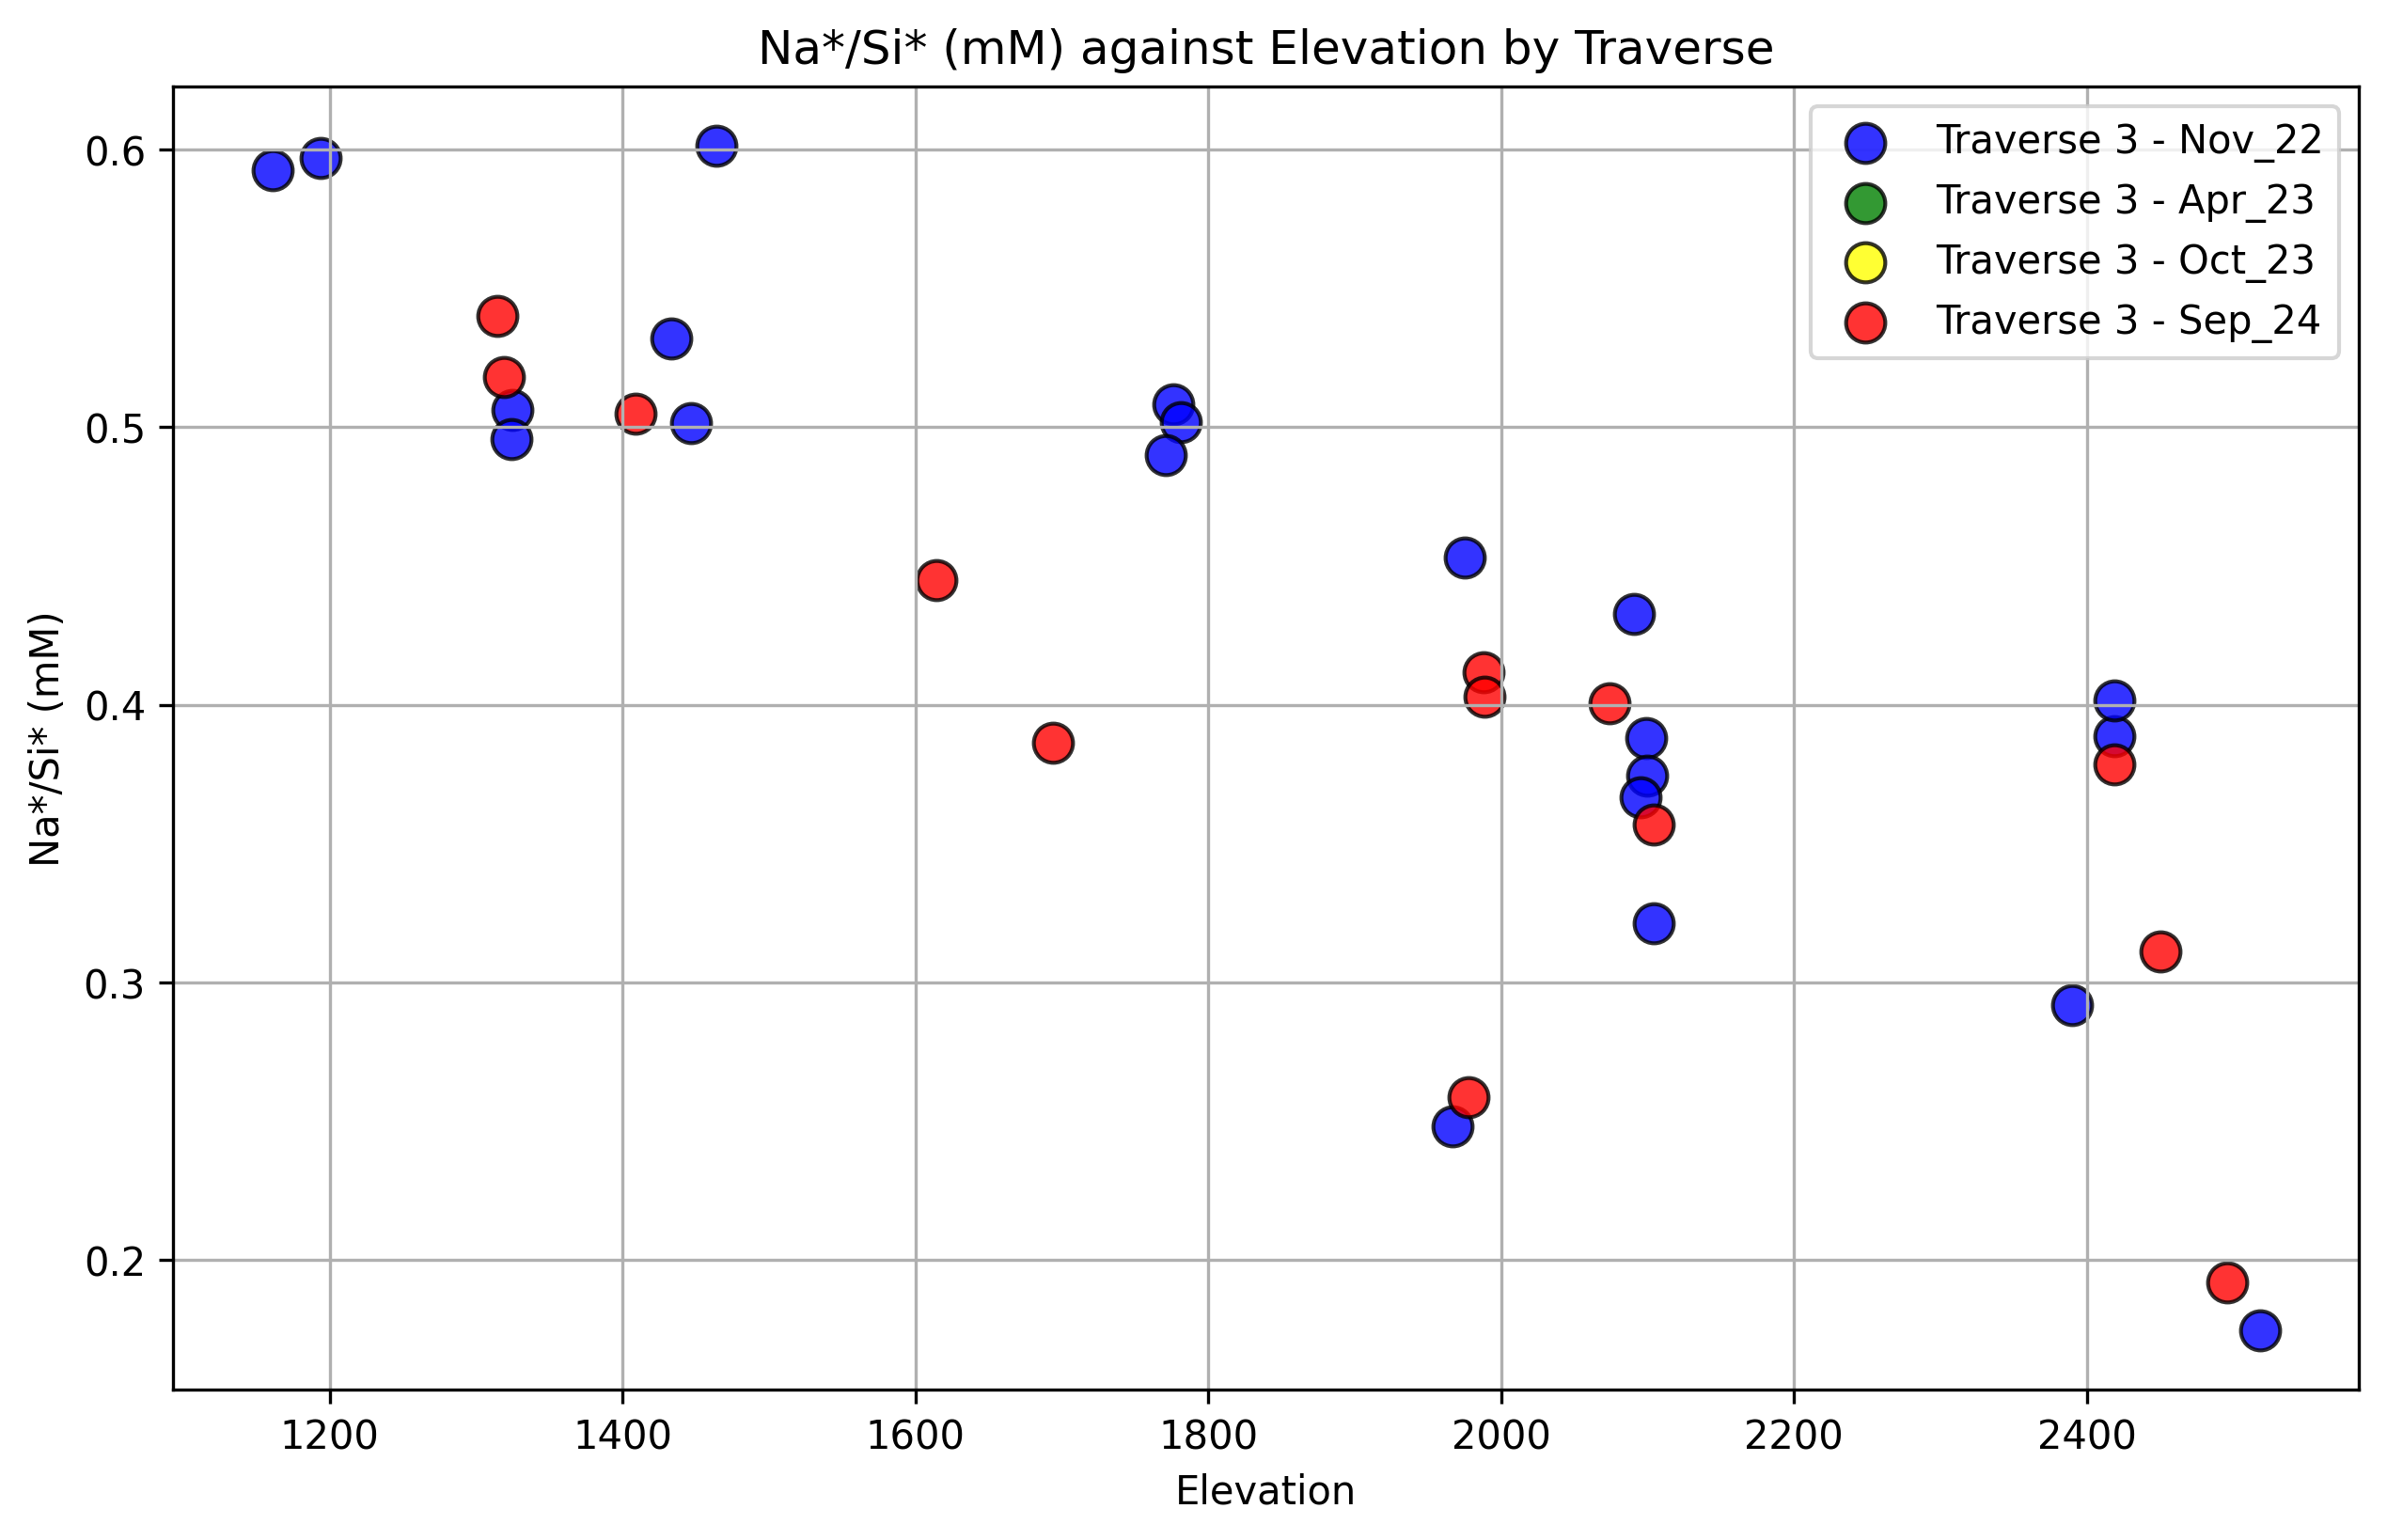

In [542]:
# plot Na and Si mM EC against Elevation coloured by Traverse

# Remove NEP24-061, NEP22-62, NEP22-61
df_copy = df_copy[~df_copy['Sample ID'].isin(['NEP24-061', 'NEP22-62', 'NEP22-61'])]


season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'yellow',
    'Sep_24': 'red'
}

# Plot Na and Si (in mM EC) against Elevation, colored by Traverse
plt.figure(figsize=(10, 6), dpi=300)


traverse_data = df_copy[df_copy['Traverse'] == 'Traverse 3']

traverse_data['Na/Si'] = traverse_data['Na_mM'] / traverse_data['Si_mM'] 

# Get color for the current traverse
color = custom_colors.get(traverse, 'black')  # Default to black if color not specified
# Plot Na/Si against Elevation, colored by Season
for season, color in season_colors.items():
    season_data = traverse_data[traverse_data['Season'] == season]
    plt.scatter(
        season_data['Elevation'], season_data['Na/Si'], 
        label=f'Traverse 3 - {season}', alpha=0.8, edgecolor='k', s=100, color=color
    )
    # # Plot Si against Elevation
    # plt.scatter(
    #     traverse_data['Elevation'], traverse_data['Si_mM_EC'], 
    #     label=f'{traverse} - Si', alpha=0.8, edgecolor='k', 
    #     marker=marker, s=100, color=color, linestyle='dotted'
    # )
    
    # for i, row in traverse_data.iterrows():
    #     plt.text(row['Elevation'], row['Na/Si'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


# Add plot labels, title, legend, and grid
plt.xlabel('Elevation')
plt.ylabel('Na*/Si* (mM)')
plt.title('Na*/Si* (mM) against Elevation by Traverse')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Sr Isotopes

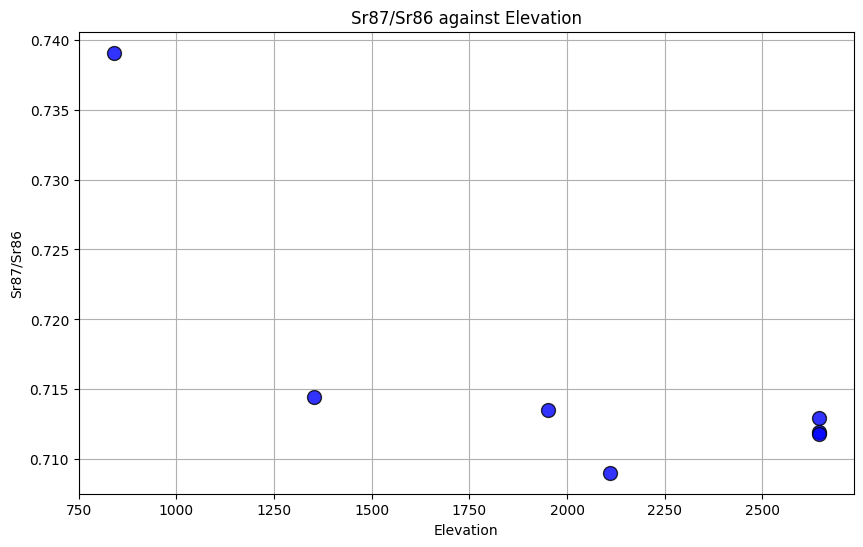

In [543]:
# plot df_rain Sr87/Sr86 against Elevation
plt.figure(figsize=(10, 6))

# Plot Sr87/Sr86 against Elevation for df_rain
plt.scatter(df_rain['Elevation'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('Elevation')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against Elevation')
plt.grid(True)

# Show the plot
plt.show()

#what is the cloud height at this time of year?

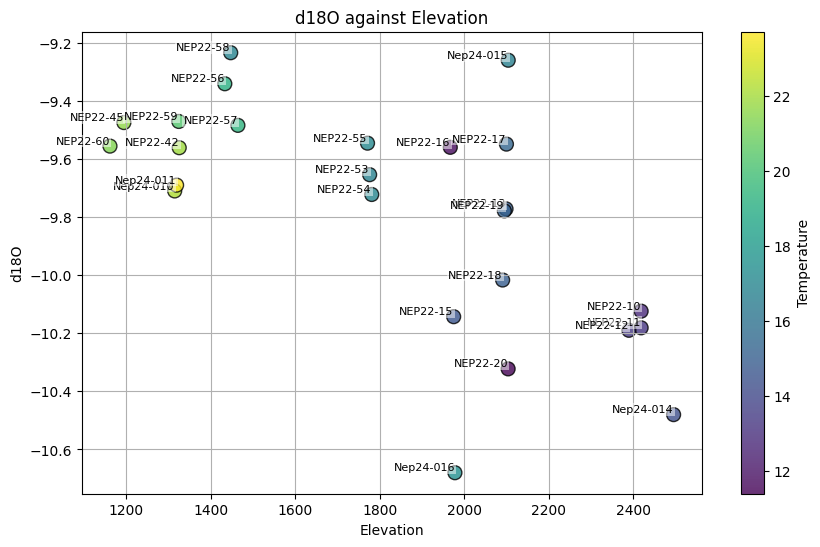

In [613]:


# suggests they are coming from deeper

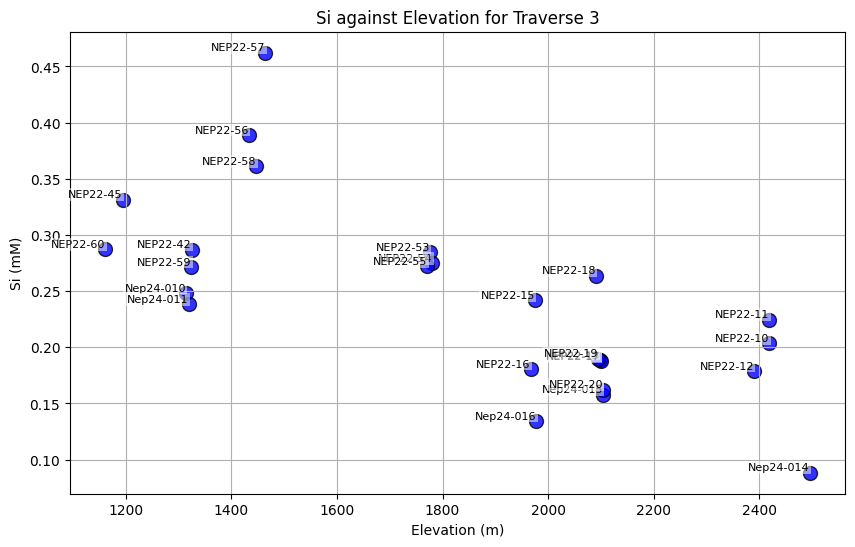

In [612]:
# Plot Si against elevation for df_mock_traverse_3
plt.figure(figsize=(10, 6))

# Scatter plot of Si against elevation
plt.scatter(df_mock_trav_3['Elevation'], df_mock_trav_3['Si_mM'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, and grid
plt.xlabel('Elevation (m)')
plt.ylabel('Si (mM)')
plt.title('Si against Elevation for Traverse 3')
plt.grid(True)

for i, row in df_mock_trav_3.iterrows():
    plt.text(row['Elevation'], row['Si_mM'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# Show the plot
plt.show()

# come from deeper flowpaths

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

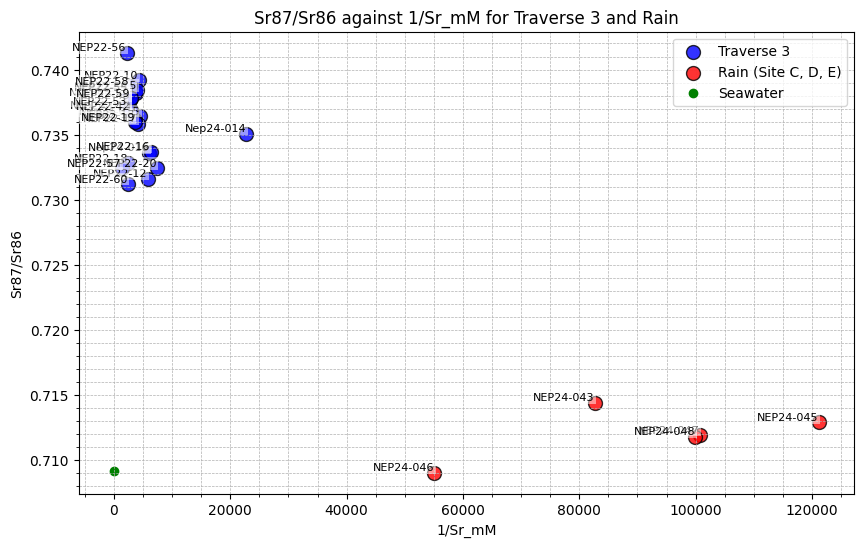

In [580]:
# Filter the dataframe for Traverse 3
df_mock_trav_3 = df_copy[df_copy['Traverse'] == 'Traverse 3']

# Plot Sr87/Sr86 against Sr_mM for df_mock_trav_3
plt.figure(figsize=(10, 6))

plt.scatter(1/df_mock_trav_3['Sr_mM'], df_mock_trav_3['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue', label='Traverse 3')

# Filter df_rain to include only Site C, D, or E
df_rain_filtered = df_rain[df_rain['Traverse'].isin(['Site C', 'Site D', 'Site E'])]

# Plot Sr87/Sr86 against Sr_mM for df_rain_filtered
plt.scatter(1/df_rain_filtered['Sr_mM'], df_rain_filtered['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='red', label='Rain (Site C, D, E)')

for i, row in df_mock_trav_3.iterrows():
    plt.text(1/row['Sr_mM'], row['Sr87/Sr86'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

for i, row in df_rain_filtered.iterrows():
    plt.text(1/row['Sr_mM'], row['Sr87/Sr86'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# Add plot labels, title, legend, and grid

# Plot seawater in green: Sr87/Sr86 = 0.70918, 1/Sr_mM = 87.62/7.8
plt.scatter(87.62/7.8, 0.70918, color='green', label='Seawater')

plt.xlabel('1/Sr_mM')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against 1/Sr_mM for Traverse 3 and Rain')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()


# Show the plot
plt.show()


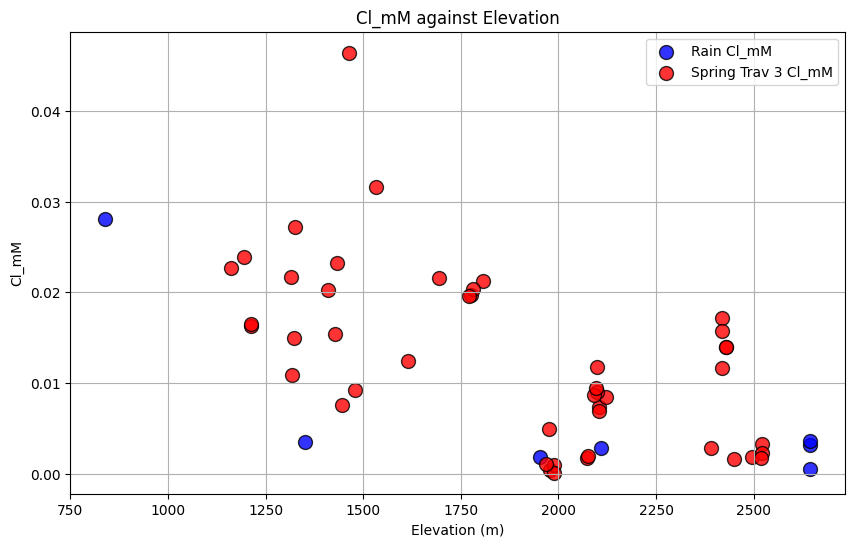

In [623]:
plt.figure(figsize=(10, 6))

df_traverse3_3xample = df_copy[df_copy['Traverse'] == 'Traverse 3']

# Plot Cl_mM against Elevation for df_rain
plt.scatter(df_rain['Elevation'], df_rain['Cl_mM'], alpha=0.8, edgecolor='k', s=100, color='blue', label='Rain Cl_mM')

# remove Nep24-013
df_traverse3_3xample = df_traverse3_3xample[df_traverse3_3xample['Sample ID'] != 'Nep24-013']

# Plot Cl_mM against Elevation for df_copy
plt.scatter(df_traverse3_3xample['Elevation'], df_traverse3_3xample['Cl_mM'], alpha=0.8, edgecolor='k', s=100, color='red', label='Spring Trav 3 Cl_mM')

# for i, row in df_copy.iterrows():
#     plt.text(row['Elevation'], row['Cl_mM'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# Add plot labels, title, legend, and grid
plt.xlabel('Elevation (m)')
plt.ylabel('Cl_mM')
plt.title('Cl_mM against Elevation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [584]:
# print Sr_mM value for NEP22_56
df_rain[df_rain['Sample ID'] == 'NEP22-056']['Sr_mM']

Series([], Name: Sr_mM, dtype: float64)

In [600]:
#Three endmembers of mixing: seawater, NEP22-56 and NEP24-045
# Seawater value:
Sr_Ratio_Seawater = 0.70918
Sr_mM_Seawater = 7.8/87.62

# NEP22-56 value:
Sr_Ratio_NEP22_56 = 0.741292
Sr_mM_NEP22_56 = 0.0404/87.62

# NEP24-045 value:
Sr_Ratio_NEP24_045 = 0.712917913
Sr_mM_NEP24_045 = 0.000723333333333333/87.62


In [ ]:
# Sr_mix = Sr_mM_Seawater * f1 + Sr_mM_NEP22_56 * f2 + Sr_mM_NEP24_045 * f3

# Sr_Ratio_mix = (Sr_Ratio_Seawater * Sr_mM_Seawater * f1 / Sr_mix ) + (Sr_Ratio_NEP22_56 * Sr_mM_NEP22_56 * f2 / Sr_mix) + (Sr_Ratio_NEP24_045 * Sr_mM_NEP24_045 * f3 / Sr_mix)

# iterate over different f values to find the best fit to the data

In [601]:

from itertools import product

# Define the endmember values
Sr_Ratio_Seawater = 0.70918
Sr_mM_Seawater = 7.8 / 87.62

Sr_Ratio_NEP22_56 = 0.741292
Sr_mM_NEP22_56 = 0.0404 / 87.62

Sr_Ratio_NEP24_045 = 0.712917913
Sr_mM_NEP24_045 = 0.000723333333333333 / 87.62

# Define the range of f1, f2, and f3 values in increments of 0.1
fractions = np.round(np.arange(0, 1.1, 0.1), 2)  # Ensuring sum constraint holds

# Store results
mixing_results = []

# Generate all possible combinations of (f1, f2, f3) that sum to 1
for f1, f2, f3 in product(fractions, repeat=3):
    if np.isclose(f1 + f2 + f3, 1):  # Ensure the fractions sum to 1

        # Calculate Sr_mM mix
        Sr_mix = Sr_mM_Seawater * f1 + Sr_mM_NEP22_56 * f2 + Sr_mM_NEP24_045 * f3

        # Calculate Sr87/Sr86 mix
        Sr_Ratio_mix = (
            (Sr_Ratio_Seawater * Sr_mM_Seawater * f1) +
            (Sr_Ratio_NEP22_56 * Sr_mM_NEP22_56 * f2) +
            (Sr_Ratio_NEP24_045 * Sr_mM_NEP24_045 * f3)
        ) / Sr_mix

        # Append results
        mixing_results.append([f1, f2, f3, Sr_mix, Sr_Ratio_mix])

# Convert to DataFrame
df_mixing = pd.DataFrame(mixing_results, columns=['f1 (Seawater)', 'f2 (NEP22-56)', 'f3 (NEP24-045)', 'Sr_mM_mix', 'Sr87/Sr86_mix'])

# Display the DataFra

In [609]:
from scipy.spatial import cKDTree
import ace_tools as tools


# Ensure df_rain and df_mock_trav_3 are properly loaded before execution
# Remove NaN or infinite values
df_rain = df_rain.replace([np.inf, -np.inf], np.nan).dropna(subset=['Sr_mM', 'Sr87/Sr86'])
df_mock_trav_3 = df_mock_trav_3.replace([np.inf, -np.inf], np.nan).dropna(subset=['Sr_mM', 'Sr87/Sr86'])


# Create a KDTree for efficient nearest neighbor search in df_mixing space
mixing_tree = cKDTree(df_mixing[['Sr_mM_mix', 'Sr87/Sr86_mix']].values)

# Function to find nearest f-values for a given dataset
def assign_f_values(df_data, df_mixing, tree):
    # Query nearest neighbor in df_mixing for each data point
    distances, indices = tree.query(df_data[['Sr_mM', 'Sr87/Sr86']].values)

    # Assign corresponding f-values from df_mixing
    df_data_assigned = df_data.copy()
    df_data_assigned['f1 (Seawater)'] = df_mixing.iloc[indices]['f1 (Seawater)'].values
    df_data_assigned['f2 (NEP22-56)'] = df_mixing.iloc[indices]['f2 (NEP22-56)'].values
    df_data_assigned['f3 (NEP24-045)'] = df_mixing.iloc[indices]['f3 (NEP24-045)'].values

    return df_data_assigned

# Assign f-values to df_rain and df_copy (assumed df_mock_trav_3 is a subset of df_copy)
df_rain_assigned = assign_f_values(df_rain, df_mixing, mixing_tree)
df_mock_trav_3_assigned = assign_f_values(df_mock_trav_3, df_mixing, mixing_tree)

# Display the assigned f-values
import ace_tools as tools
tools.display_dataframe_to_user(name="Assigned Mixing Fractions for Rain Samples", dataframe=df_rain_assigned)
tools.display_dataframe_to_user(name="Assigned Mixing Fractions for Traverse 3", dataframe=df_mock_trav_3_assigned)


ModuleNotFoundError: No module named 'ace_tools'

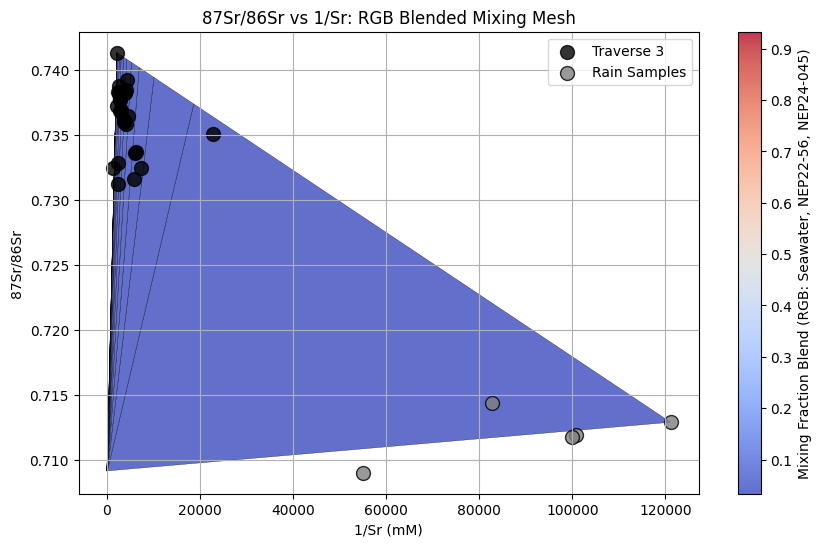

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri

# Create a triangulation for the mesh
triang = tri.Triangulation(1 / df_mixing['Sr_mM_mix'], df_mixing['Sr87/Sr86_mix'])

# Convert f1, f2, f3 into RGB colors (normalized)
colors = np.vstack([df_mixing['f1 (Seawater)'], df_mixing['f2 (NEP22-56)'], df_mixing['f3 (NEP24-045)']]).T

# Normalize the color components so each fraction is between 0 and 1
colors = colors / colors.max(axis=0)

# Compute an interpolated RGB color per triangle
tri_colors = np.mean(colors[triang.triangles], axis=1)

# Create the figure
plt.figure(figsize=(10, 6))

# Convert blended RGB into a colormap for tripcolor
plt.tripcolor(triang, facecolors=tri_colors[:, 0], cmap="coolwarm", edgecolors='k', alpha=0.8)

# Add color bar for RGB blending
cbar = plt.colorbar()
cbar.set_label("Mixing Fraction Blend (RGB: Seawater, NEP22-56, NEP24-045)")

# Plot the real data points for Traverse 3
plt.scatter(1/df_mock_trav_3['Sr_mM'], df_mock_trav_3['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='black', label='Traverse 3')

# Plot rain sample data (filtered for Site C, D, and E)
df_rain_filtered = df_rain[df_rain['Traverse'].isin(['Site C', 'Site D', 'Site E'])]
plt.scatter(1/df_rain_filtered['Sr_mM'], df_rain_filtered['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='gray', label='Rain Samples')

# Add plot labels, title, legend, and grid
plt.xlabel('1/Sr (mM)')
plt.ylabel('87Sr/86Sr')
plt.title('87Sr/86Sr vs 1/Sr: RGB Blended Mixing Mesh')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()


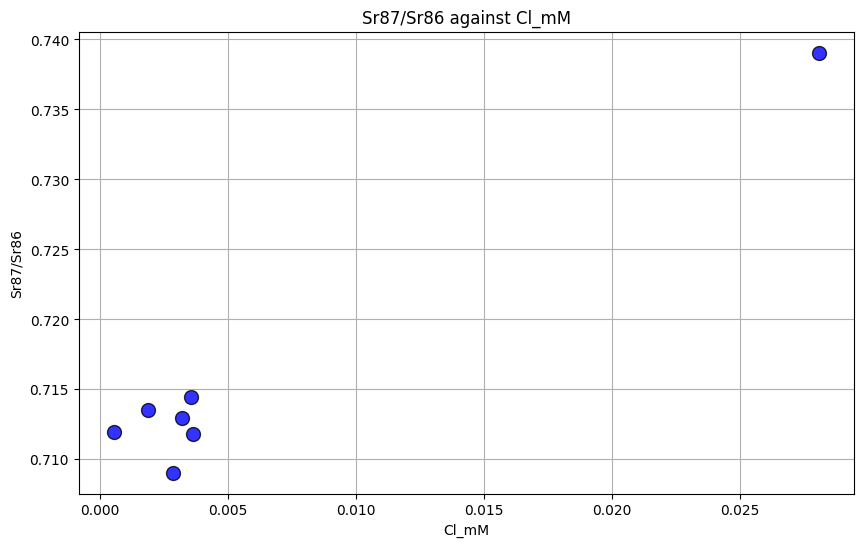

In [544]:
#plot Sr87/Sr86 against Cl_mM for df_rain

plt.figure(figsize=(10, 6))

# Plot Sr87/Sr86 against Cl_mM for df_rain
plt.scatter(df_rain['Cl_mM'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('Cl_mM')
plt.ylabel('Sr87/Sr86')

plt.title('Sr87/Sr86 against Cl_mM')
plt.grid(True)

# Show the plot
plt.show()



In [545]:
#

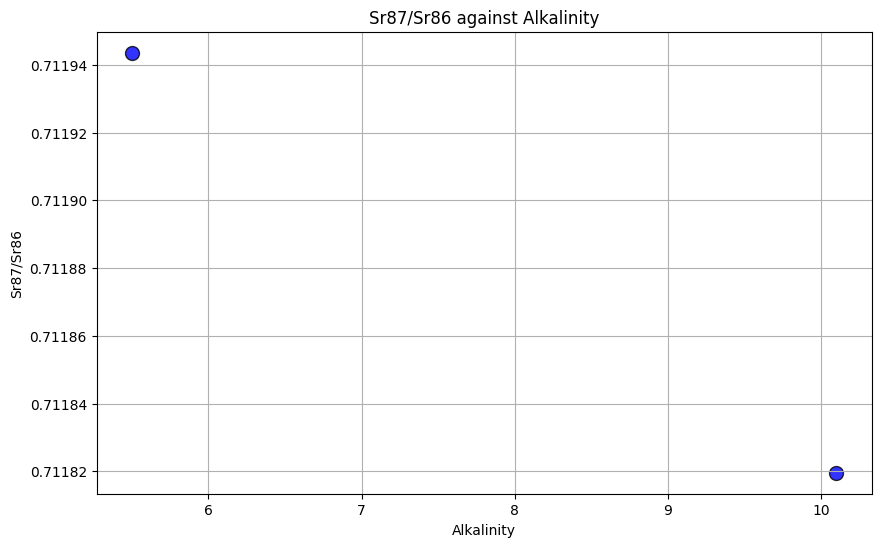

In [546]:
# plot df_rain Sr87/Sr86 against Elevation
plt.figure(figsize=(10, 6))

# Filter the dataframe for the specific samples
df_filtered = df_rain[df_rain['Sample ID'].isin(['NEP24-047', 'NEP24-048'])]

# Plot Sr87/Sr86 against Elevation for df_rain
plt.scatter(df_filtered['Alkalinity'], df_filtered['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('Alkalinity')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against Alkalinity')
plt.grid(True)

# Show the plot
plt.show()



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


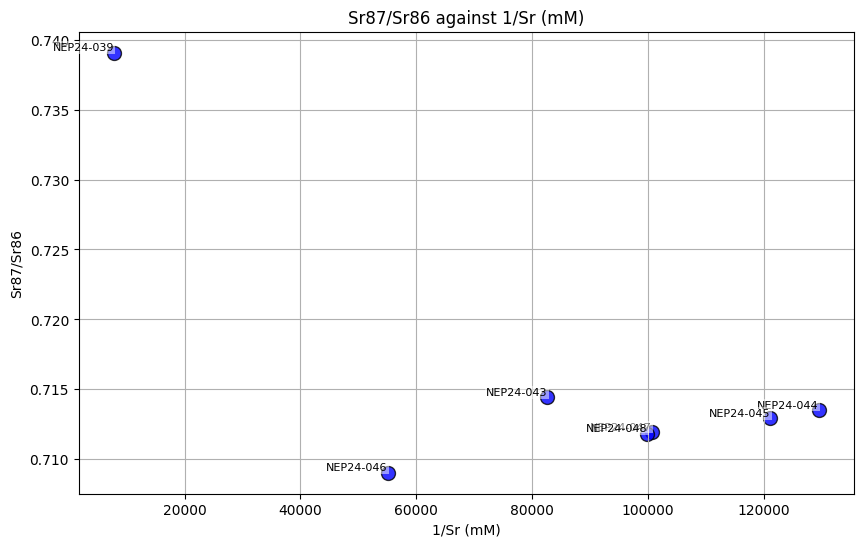

In [547]:
# plot Sr87/Sr86 against 1/Sr(mM) for df_rain

plt.figure(figsize=(10, 6))
# Calculate 1/Sr(mM)
df_rain['1/Sr_mM'] = 1 / df_rain['Sr_mM']
# Plot Sr87/Sr86 against 1/Sr(mM) for df_rain
plt.scatter(df_rain['1/Sr_mM'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')



for i, row in df_rain.iterrows():
    plt.text(row['1/Sr_mM'], row['Sr87/Sr86'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# Add plot labels, title, legend, and grid
plt.xlabel('1/Sr (mM)')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against 1/Sr (mM)')
plt.grid(True)

# Show the plot
plt.show()

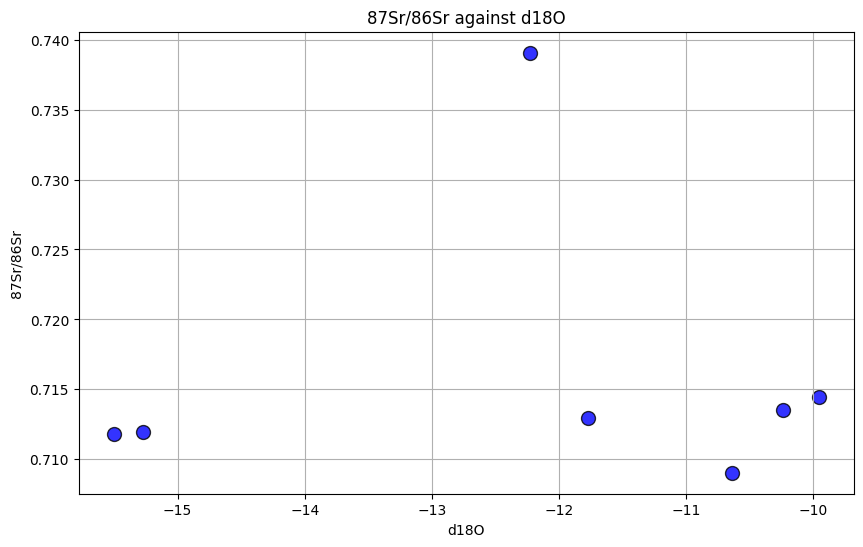

In [548]:
# plot 87Sr/86Sr against d18O for df_rain
plt.figure(figsize=(10, 6))

# Plot 87Sr/86Sr against d18O for df_rain
plt.scatter(df_rain['d18O'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('d18O')
plt.ylabel('87Sr/86Sr')
plt.title('87Sr/86Sr against d18O')
plt.grid(True)

# Show the plot
plt.show()


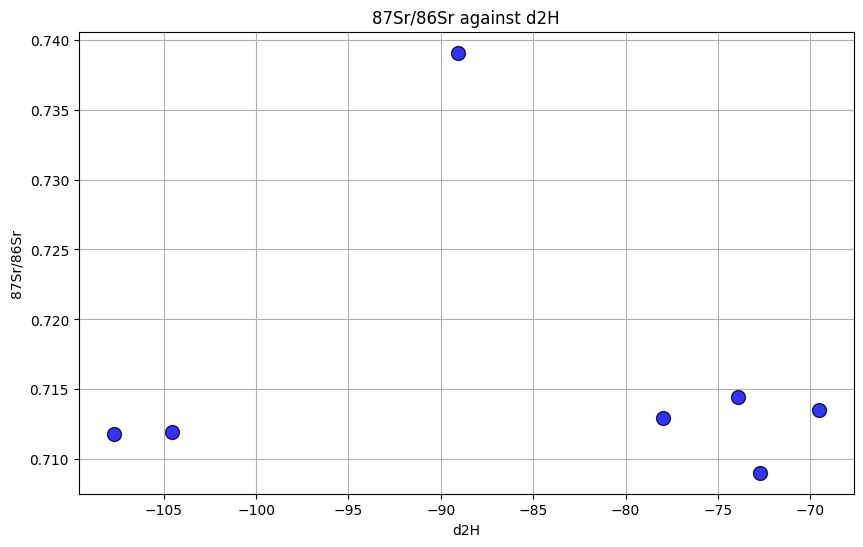

In [549]:
# plot 87Sr/86Sr against d18O for df_rain
plt.figure(figsize=(10, 6))

# Plot 87Sr/86Sr against d18O for df_rain
plt.scatter(df_rain['d2H'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('d2H')
plt.ylabel('87Sr/86Sr')
plt.title('87Sr/86Sr against d2H')
plt.grid(True)

# Show the plot
plt.show()


# Sr Correction

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

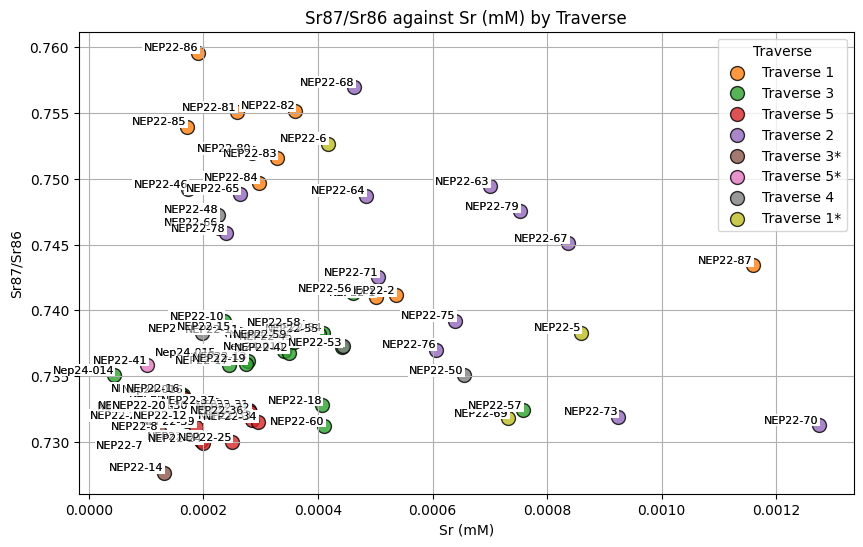

In [550]:

# Plot Sr87/Sr86 against Sr_mM for df_copy
plt.figure(figsize=(10, 6))

# Plot Sr87/Sr86 against Sr_mM for df_copy by traverse
for traverse in df_copy['Traverse'].unique():
    traverse_data = df_copy[df_copy['Traverse'] == traverse]
    plt.scatter(traverse_data['Sr_mM'], traverse_data['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, label=traverse)
    for i, row in df_copy.iterrows():
        zorder = 3 if row['Traverse'] == 'Traverse 3' else 2
        plt.text(row['Sr_mM'], row['Sr87/Sr86'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1), zorder=zorder)

# Add plot labels, title, legend, and grid
plt.xlabel('Sr (mM)')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against Sr (mM) by Traverse')
plt.legend(title='Traverse')
plt.grid(True)

# Show the plot
plt.show()

In [551]:
# print the Sr87/Sr86 and Sr_mM values for NEP22-56

print(df_copy[df_copy['Sample ID'] == 'NEP22-56'][['Sr_mM', 'Sr87/Sr86']])

        Sr_mM  Sr87/Sr86
163  0.000461   0.741292


In [552]:
#print the max rain Sr_mM
print(df_rain['Sr_mM'].max())

0.00012797686981663243


In [553]:
df_traverse3 = df_copy[df_copy['Traverse'] == 'Traverse 3']

In [570]:
import numpy as np
import pandas as pd

def get_closest_rain_sample_Sr(row, df_rain):
    """Find the closest rain sample based on latitude and longitude."""
    try:
        # Filter valid rain samples with non-null Sr87/Sr86 values
        df_rain_valid = df_rain.dropna(subset=['Sr87/Sr86'])
        
        if df_rain_valid.empty:
            print(f"🚨 No valid rain sample found for row {row.name}")
            return None  

        # Compute distances and find the closest sample
        distances = (df_rain_valid[['Latitude', 'Longitude']] - row[['Latitude', 'Longitude']]).pow(2).sum(axis=1)
        closest_index = distances.idxmin()
        
        return df_rain_valid.loc[closest_index]
    except Exception as e:
        print(f"🚨 Error finding closest rain sample for row {row.name}: {e}")
        return None

# Function for Sr correction using the derived f_rain formula
def sr_correction(row, sr_weathering, df_rain):
    """Applies Sr correction using the mass balance and isotopic equations."""
    if row[['Sr87/Sr86', 'Sr_mM']].isnull().any():
        print(f"🚨 Warning: NaN detected in input data for row {row.name}")
        return pd.Series({f'{element}_Sr_Corrected_mM': None for element in element_dict})

    sr87_sr86_sample = row['Sr87/Sr86']
    sr_mM_sample = row['Sr_mM']

    # Find the closest rain sample
    closest_rain_sample = get_closest_rain_sample_Sr(row, df_rain)
    if closest_rain_sample is None:
        print(f"🚨 Warning: No closest rain sample found for row {row.name}")
        return pd.Series({f'{element}_Sr_Corrected_mM': None for element in element_dict})

    sr87_sr86_rain = closest_rain_sample['Sr87/Sr86']
    sr_mM_rain = closest_rain_sample['Sr_mM']

    sr87_sr86_weathering = 0.759572 # Rock being weathered has a particular Sr87/Sr86 value

    # Compute f_rain using the equation
    numerator = sr87_sr86_weathering - sr87_sr86_sample
    denominator = sr87_sr86_weathering - sr87_sr86_rain

    # Ensure denominator is valid
    if pd.isna(denominator) or denominator == 0:
        print(f"🚨 Warning: Invalid denominator for row {row.name}, setting f_rain to NaN")
        return pd.Series({f'{element}_Sr_Corrected_mM': None for element in element_dict})

    f_rain = numerator / denominator
    print(f"✅ Calculated f_rain for row {row.name}: {f_rain}")

    # Apply correction to element concentrations
    corrected_values = {}
    for element in element_dict:
        corrected_values[f'{element}_SC_mM'] = (1 - f_rain) * row[f'{element}_mM']
        print(f"Before correction ({element}): {row[f'{element}_mM']}")
        print(f"After correction ({element}): {corrected_values[f'{element}_SC_mM']}")

    print("-" * 50)
    
    return pd.Series(corrected_values)

# Assume Sr_weathering is a known or estimated value
sr_weathering = 0.0002  # Example placeholder, replace with actual value

# Apply the correction
df_traverse3_valid = df_traverse3.dropna(subset=['Sr87/Sr86'])
df_corrected_traverse3 = df_traverse3_valid.apply(
    sr_correction, axis=1, sr_weathering=sr_weathering, df_rain=df_rain
)

# Merge corrected values back into df_traverse3
df_traverse3 = df_traverse3.merge(df_corrected_traverse3, left_index=True, right_index=True, how='left')

print(df_traverse3.head())


✅ Calculated f_rain for row 51: 0.502407916498561
Before correction (Ca): 0.06806143962075849
After correction (Ca): 0.03386683354700061
Before correction (Sr): 0.00034113216160693905
After correction (Sr): 0.0001697446630433464
Before correction (Mg): 0.015072535307829425
After correction (Mg): 0.007499974247471847
Before correction (Si): 0.2482004271982912
After correction (Si): 0.12350256769554495
Before correction (Na): 0.13402109612875165
After correction (Na): 0.06668783645585218
Before correction (Li): 5.389048991354466e-05
After correction (Li): 2.6815481156993975e-05
Before correction (K): 0.02121636828644501
After correction (K): 0.010557096899986029
Before correction (Al): 0.00015344699777613044
After correction (Al): 7.635401133046542e-05
Before correction (Cl): 0.021651523836389276
After correction (Cl): 0.01077362685673001
--------------------------------------------------
✅ Calculated f_rain for row 52: 0.48167762316259094
Before correction (Ca): 0.06191573103792415
Afte

In [555]:
print(df_corrected_traverse3.shape)
print(df_corrected_traverse3.head())


(25, 9)
    Ca_SC_mM  Sr_SC_mM  Mg_SC_mM  Si_SC_mM  Na_SC_mM  Li_SC_mM   K_SC_mM  \
51  0.033867  0.000170  0.007500  0.123503  0.066688  0.000027  0.010557   
52  0.032092  0.000182  0.007277  0.123491  0.063987  0.000021  0.011647   
53  0.006526  0.000021  0.002186  0.041985  0.008059  0.000020  0.002968   
54  0.016912  0.000120  0.004743  0.085660  0.030558  0.000021  0.005541   
55  0.014526  0.000080  0.004186  0.065318  0.016893  0.000024  0.005266   

    Al_SC_mM  Cl_SC_mM  
51  0.000076  0.010774  
52  0.000170  0.005662  
53  0.000157  0.000874  
54  0.000149  0.004002  
55  0.000196  0.000191  


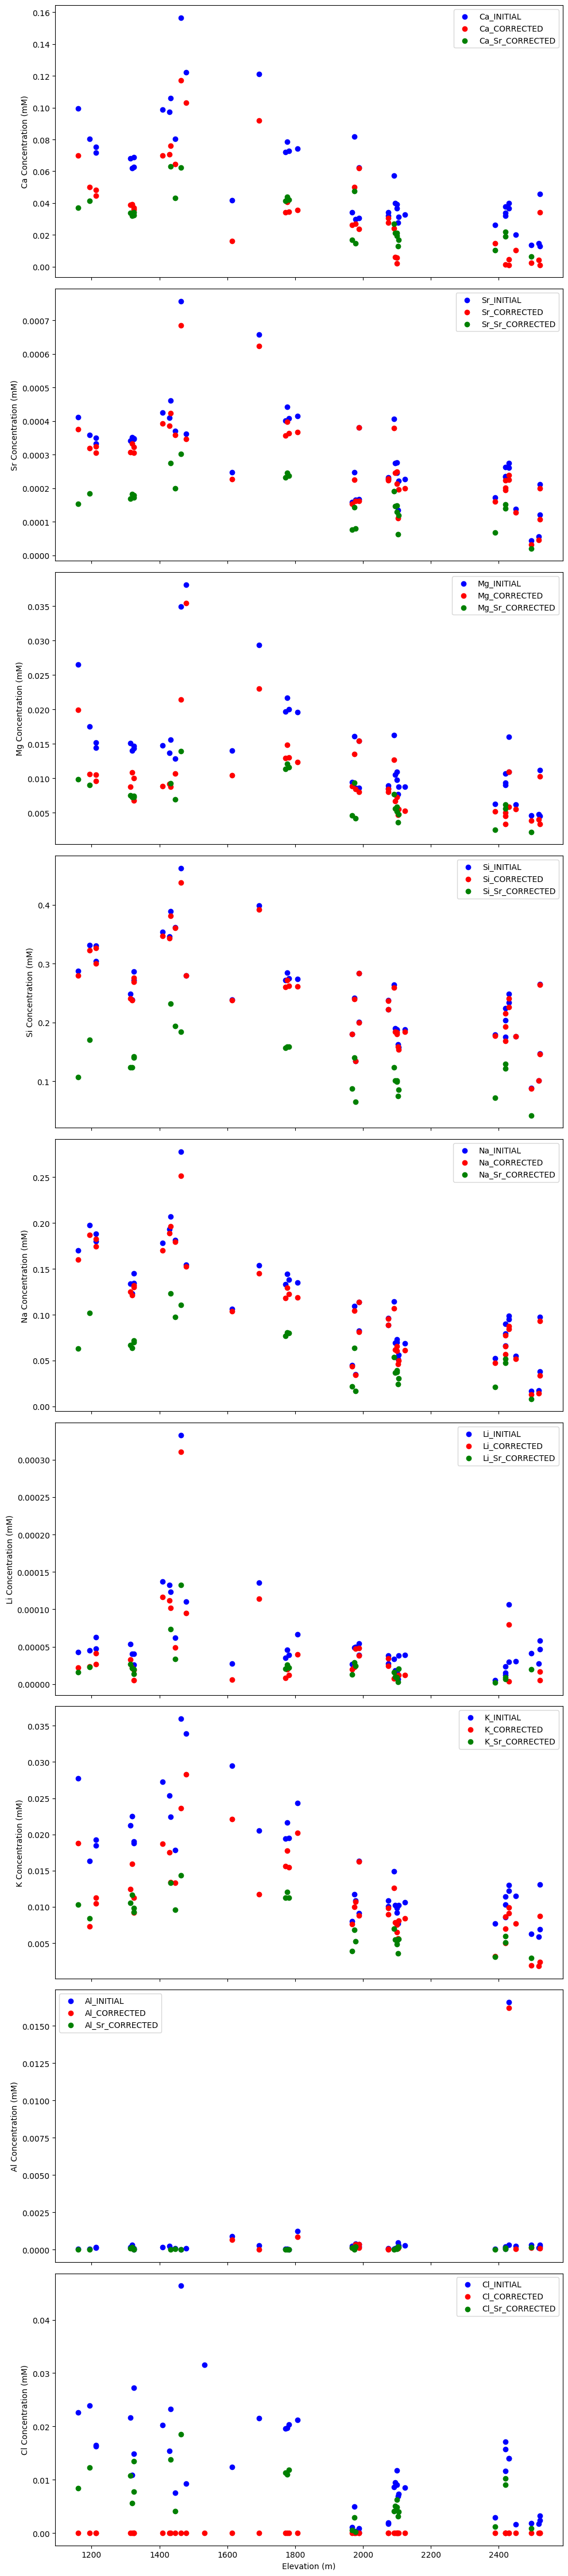

In [556]:
# remove NEP22-57 from df_traverse3
#df_traverse3 = df_traverse3[df_traverse3['Sample ID'] != 'NEP22-57']

# Filter to include only Traverse 3
df_traverse3 = df_traverse3[df_traverse3['Traverse'] == 'Traverse 3']

# Create a figure and axes for the plots
fig, axs = plt.subplots(len(element_dict), 1, figsize=(10, len(element_dict) * 5), sharex=True)

# Loop through each element and create a scatter plot
for i, element in enumerate(element_dict):
    ax = axs[i]
    ax.scatter(df_traverse3['Elevation'], df_traverse3[f'{element}_mM'], label=f'{element}_INITIAL', color='blue')
    ax.scatter(df_traverse3['Elevation'], df_traverse3[f'{element}_mM_EC'], label=f'{element}_CORRECTED', color='red')
    ax.scatter(df_traverse3['Elevation'], df_traverse3[f'{element}_SC_mM'], label=f'{element}_Sr_CORRECTED', color='green')
    
    # for i, row in df_traverse3.iterrows():
    #     ax.text(row['Elevation'], row[f'{element}_Sr_Corrected_mM'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))
    ax.set_ylabel(f'{element} Concentration (mM)')
    ax.legend()

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Elevation (m)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
plt.close()


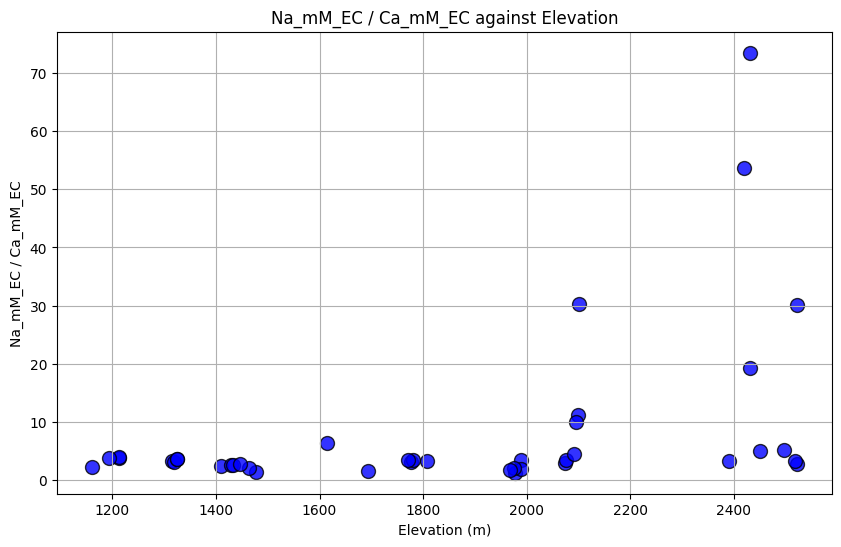

In [557]:
# Calculate the ratio Na_mM_EC/Ca_mM_EC
df_traverse3['Na/Ca_EC'] = df_traverse3['Na_mM_EC'] / df_traverse3['Ca_mM_EC']

# remove Na/Ca values less than zero
df_traverse3 = df_traverse3[df_traverse3['Na/Ca_EC'] > 0]


plt.figure(figsize=(10, 6))

# Plot Na_mM_EC/Ca_mM_EC against elevation for df_traverse3
plt.scatter(df_traverse3['Elevation'], df_traverse3['Na/Ca_EC'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('Elevation (m)')
plt.ylabel('Na_mM_EC / Ca_mM_EC')
plt.title('Na_mM_EC / Ca_mM_EC against Elevation')
plt.grid(True)

# Show the plot
plt.show()


# XSil for Traverse 3

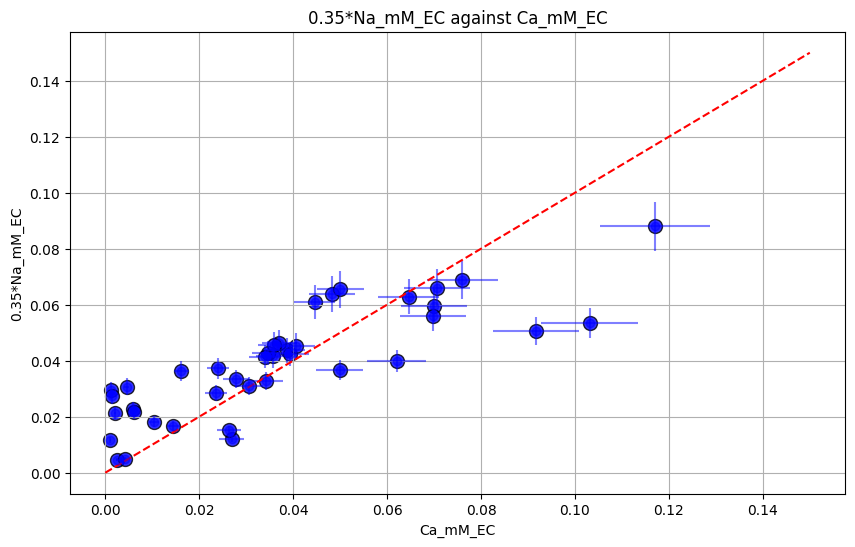

In [568]:



def Xsil(df):
    
    df_copy = df.copy()

    #print(df_copy)
    
    CaNa_sil = 0.35

    MgNa_sil = 0.24

    
    df_copy['Ca_Sil'] = df_copy['Na_mM_EC'] * CaNa_sil
    
    df_copy['Mg_Sil'] = df_copy['Na_mM_EC'] * MgNa_sil
    
    # nominator
    
    df_copy['X_Sil_Nom'] = ((2*0.35*df_copy['Na_mM_EC']) + (2*0.24*df_copy['Na_mM_EC']) + df_copy['K_mM_EC'] + df_copy['Na_mM_EC'])
    
    # denominator
    df_copy['X_Sil_Denom'] = ((2*df_copy['Ca_mM_EC']) + (2*df_copy['Mg_mM_EC']) + df_copy['K_mM_EC'] + df_copy['Na_mM_EC'])
    
    
    print('Nominator:', df_copy['X_Sil_Nom'])
    
    print('Denominator:', df_copy['X_Sil_Denom'])
    
    
    # df_copy['X_Sil'] - df_copy['X_Sil_Nom'] / df_copy['X_Sil_Denom']
    
    #df_copy['X_Sil'] = ((df_copy['Ca_Sil']/2) + (df_copy['Mg_Sil']/2) + df_copy['*K [aq] (mM)'] + df_copy['*Na [aq] (mM)'])/((2*df_copy['*Ca [aq] (mM)']) + (2*df_copy['*Mg [aq] (mM)']) + df_copy['*K [aq] (mM)'] + df_copy['*Na [aq] (mM)'])
    
    # Filter out X_Sil > 1.0 Samples, and print them "these samples were >1"
    
    filtered_df = df_copy[df_copy['X_Sil'] > 1.0]
    
    # print("These samples had XSil >1:")
    # for index, row in filtered_df.iterrows():
    #     print(row['Sample ID'])
    
    
    #### Changed so it forces to 1.0
    
    # Set any value greater than 1 to 1.0
    #df_copy.loc[df_copy['X_Sil'] > 1.0, 'X_Sil'] = 1.0
    
    
    plt.figure(figsize=(10,6))
    scatter = plt.scatter(df_copy['X_Sil'], df_copy['Elevation'], alpha=0.7, s=70)
    plt.xlabel('XSil')
    plt.ylabel('Elevation')
    
    plt.title(f'Scatter plot of Altitude vs. XSil')

            # Annotate each point with unique_code
    for index, row in df_copy.iterrows():
        plt.text(row['X_Sil'], row['Elevation'], row['Sample ID'], fontsize=8, ha='center', va='bottom')

    #plt.legend()  # Include legend with labels
    #plt.savefig('chemweathering/figures/XSil_Refugio_V_Rainwater.png') 
    plt.show()  # Show each plot individually #
    plt.close()
    #return(df_copy)



# df_traverse3['X_Sil_Nom'] = ((2*0.35*df_traverse3['Na_mM_EC']) + (2*0.24*df_traverse3['Na_mM_EC']) + df_traverse3['K_mM_EC'] + df_traverse3['Na_mM_EC'])
    
# # denominator
# df_traverse3['X_Sil_Denom'] = ((2*df_traverse3['Ca_mM_EC']) + (2*df_traverse3['Mg_mM_EC']) + df_traverse3['K_mM_EC'] + df_traverse3['Na_mM_EC'])

# df_traverse3['X_Sil'] = df_traverse3['X_Sil_Nom'] / df_traverse3['X_Sil_Denom']

# print(df_traverse3['X_Sil'])
# print 0.35*df_traverse3['Na_mM_EC'] against Ca_mM_EC with elevation
plt.figure(figsize=(10, 6))

# Plot 0.35*Na_mM_EC against Ca_mM_EC for df_traverse3
plt.scatter(df_traverse3['Ca_mM_EC'], 0.35*df_traverse3['Na_mM_EC'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add error bars
xerr = 0.1 * df_traverse3['Ca_mM_EC']
yerr = 0.1 * 0.35 * df_traverse3['Na_mM_EC']
plt.errorbar(df_traverse3['Ca_mM_EC'], 0.35*df_traverse3['Na_mM_EC'], xerr=xerr, yerr=yerr, fmt='o', color='blue', alpha=0.5)

# Add a 1:1 plot
plt.plot([0, 0.15], [0, 0.15], color='red', linestyle='dashed')

# Add plot labels, title, legend, and grid
plt.xlabel('Ca_mM_EC')
plt.ylabel('0.35*Na_mM_EC')
plt.title('0.35*Na_mM_EC against Ca_mM_EC')
plt.grid(True)  

# Show the plot
plt.show()    
